# CRM AI Analysis

The notebook will present an Exploratory Data Analysis (EDA) of a Customer Relationship Management (CRM) sales pipeline for a company dealing in computer hardware, featuring details on accounts, products, sales teams, and potential sales prospects. Throughout this analysis, we will examine the intricacies of the sales process—from initial customer engagement to the final stages of deal closure—while leveraging feature engineering and machine learning techniques for customer segmentation and lifetime value prediction.

## Notebooks Overview
The main topics of this notebook are:

- Exploratory Data Analysis from the sales pipeline, products, customers and sales teams;
- Overall feature engineering;
- Multiple **Clustering** Analysis (Agglomerative, K-Means, HDBSCAN, etc) for customer segmentation;
- **RFM** (Recency, Frequency and Monetary) Analysis;
- Exploratory Data Analysis from the best Clustering Algorithm;
- More feature engineering tecniques like Customer Life Time Value (CLTV) and others for a filtered dataset containing only 'Won' deal stage status;
- Build and training a Beta Geo Fitter and a Gamma Gamma Fitter for a **Customer Life Time Value prediction**.

## Objectives

This notebook is designed to achieve the following objectives:

- **Understand Sales Dynamics**:
    - Explore key metrics and trends in the sales pipeline.
    - Identify customer segments based on behavioral and transactional data.

- **Improve Sales Strategy**:
    - Reveal bottlenecks in the sales process.
    - Provide insights that can guide the sales team in optimizing their outreach and follow-up efforts.

- **Enhance Data-Driven Decision Making:**
    - Utilize clustering and RFM analyses to derive actionable insights.
    - Predict Customer Lifetime Value (**CLTV**) to inform strategic planning and resource allocation.

- **Model Building**:
    - Develop predictive models (using Beta Geo Fitter and Gamma Gamma Fitter) to forecast future sales and customer behavior.
    - Validate and refine these models to support the overall CRM strategy.

## Methodology

To ensure that our analysis is thorough and robust, we follow a structured methodology comprising the following steps:

**Exploratory Data Analysis (EDA) along with a Data Preparation and Cleaning:**
- Import and examine the dataset to understand its structure.
- Visualize key metrics such as customer distribution, deal stages, and sales cycle duration.
- Identify patterns, trends, and potential outliers in the data
- Perform data cleaning and transformation to prepare for analysis.

**Feature Engineering:**
- Derive new features, including RFM scores and engagement metrics.
- Develop variables that support both segmentation and predictive analysis.

**Clustering Analysis for Customer Segmentation:**
- Apply multiple clustering algorithms (e.g., Agglomerative, K-Means, HDBSCAN) to segment the customer base.
- Evaluate and compare the performance of each clustering approach.
- Choose a best clustering algorithm to follow along in a deep segmentation analysis

**Predictive Modeling:**
- Use statistical models like Beta Geo Fitter and Gamma Gamma Fitter to forecast Customer Lifetime Value.
- Validate the model predictions against historical data to ensure accuracy.

**Interpretation and Reporting:**
- Synthesize the findings into clear visualizations and narratives.
- Highlight actionable insights that can drive business decisions and optimize sales strategies.
- Export the enriched dataset with the new features and predictions.

## Disclaimer

We only used the `Won` deal stage status for our data analysis and model predictions. Future work will focus in all deal stage analysis.

## Project Continuity

If you like my EDA present in this notebook, i strongly recomend you to checkout my GitHub repository where I went a bit further than just making an EDA and model prediction. The GitHub repository can be accessed in this link: https://github.com/DiogoSoares3/CRM-AI-Analysis.

### Project description

In a nutshell, after my EDA and model predcition, I made a plataform with a ChatBot that translates natural language question in a SQL query which queries a database populated by the enriched dataset. The pipeline to take this make this chatbot is linke this:

![propject_workflow.png](../reports/figures/project_workflow.png)

To view more details about the project, checkout my GitHub repo linked above.

## Source
The analysis below was carried out using public data and was available on this link: https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities/

# Imports

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import squarify
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering, KMeans
from lifetimes import BetaGeoFitter, GammaGammaFitter
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.plotting import plot_period_transactions

In [2]:
accounts_df = pd.read_csv('../data/accounts.csv')
products_df = pd.read_csv('../data/products.csv')
data_dictionary = pd.read_csv('../references/data_dictionary.csv')
sales_pipeline_df = pd.read_csv('../data/sales_pipeline.csv')
sales_teams_df = pd.read_csv('../data/sales_teams.csv')

## Dataset Description

In [3]:
data_dictionary

,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees
5,accounts,office_location,Headquarters
6,accounts,subsidiary_of,Parent company
7,products,product,Product name
8,products,series,Product series
9,products,sales_price,Suggested retail price


# Exploratory data analysis

In [4]:
accounts_df['office_location'].value_counts()

office_location
United States    71
Kenya             1
Philipines        1
Japan             1
Italy             1
Norway            1
Korea             1
Jordan            1
Brazil            1
Germany           1
Panama            1
Belgium           1
Romania           1
Poland            1
China             1
Name: count, dtype: int64

Most of our customer are from United States

In [5]:
accounts_df[accounts_df['office_location'] == 'Brazil']

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
49,Nam-zim,services,1987,405.59,1179,Brazil,Warephase


In [6]:
sales_pipeline_df.account.value_counts()

account
Hottechi                 200
Kan-code                 196
Konex                    178
Condax                   170
Dontechi                 129
                        ... 
Newex                     55
Bioplex                   53
The New York Inquirer     52
Sumace                    52
Iselectrics               51
Name: count, Length: 85, dtype: int64

In total, we have 85 registered customers. Hottechi is a customer company that had the most engagement count

In [7]:
products_df

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482
5,GTX Plus Basic,GTX,1096
6,GTK 500,GTK,26768


Base sale price for all products from the company

In [8]:
sales_pipeline_df.head(20)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
9,HAXMC4IX,James Ascencio,MG Advanced,NaN,Engaging,2016-11-03,NaN,NaN


In [4]:
len(sales_pipeline_df)

8800

In [6]:
sales_pipeline_df['deal_stage'].value_counts()

deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

In [9]:
sales_pipeline_df.isnull().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

We have above 2000 missing values for close date and value, mostly likely because the other `deal_stages` are not `Won` neither `Lost`

In [10]:
sales_pipeline_df[sales_pipeline_df['deal_stage'] == 'Engaging'].isnull().sum()

opportunity_id       0
sales_agent          0
product              0
account           1088
deal_stage           0
engage_date          0
close_date        1589
close_value       1589
dtype: int64

In [7]:
len(sales_pipeline_df[(sales_pipeline_df['deal_stage'] == 'Engaging') | (sales_pipeline_df['deal_stage'] == 'Prospecting')])

2089

In [8]:
sales_pipeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


## Customers per Country

In [9]:
accounts_df.columns

Index(['account', 'sector', 'year_established', 'revenue', 'employees',
       'office_location', 'subsidiary_of'],
      dtype='object')

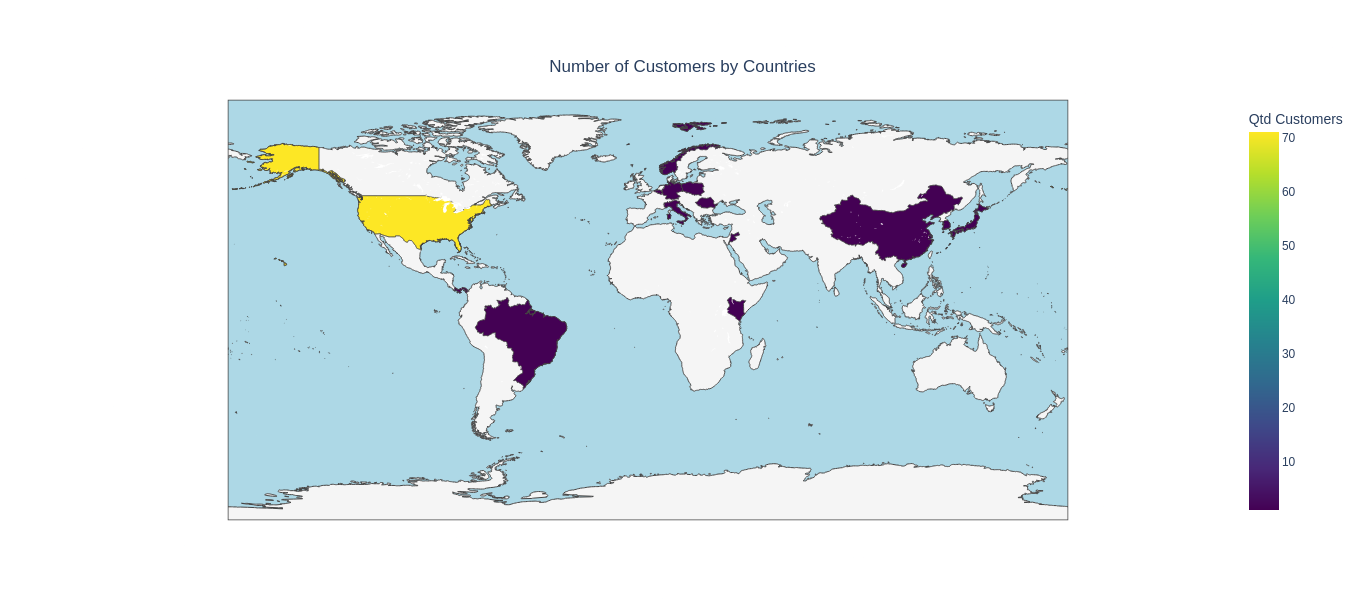

In [11]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

accounts_sales_pipeline_df = pd.merge(sales_pipeline_df, accounts_df, on='account', how='inner')

world_map = accounts_sales_pipeline_df[['account', 'sector', 'office_location']].groupby(
    ['account', 'sector', 'office_location']
).count().reset_index(drop=False)

countries = world_map['office_location'].value_counts()

choromap = go.Figure(data=go.Choropleth(
    locations=countries.index,
    locationmode='country names',
    z=countries.values,
    text=countries.index,
    colorscale='Viridis',
    colorbar_title='Qtd Customers'
))

choromap.update_layout(
    title={
        'text': "Number of Customers by Countries",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        resolution=50,
        showocean=True,
        oceancolor="LightBlue",
        showland=True,
        landcolor="whitesmoke",
        showframe=True
    ),
    template='plotly_white',
    height=600,
    width=1000
)

choromap.show()

This graph show us that the United States has the most customers

## Engage Date vs. Close Date

In [15]:
missing_percentage_engage_date = sales_pipeline_df['engage_date'].isna().mean() * 100
missing_percentage_close_date = sales_pipeline_df['close_date'].isna().mean() * 100
print(missing_percentage_engage_date)
print(missing_percentage_close_date)

5.681818181818182
23.738636363636363


We have a 5.7% missing values on `engage_date` and 23.7% in `close_date`. That is because only `Won` deal stage have a close date

In [16]:
sales_pipeline_df[sales_pipeline_df['engage_date'].isna()].head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
8300,6CWZFOHJ,Anna Snelling,GTX Basic,Green-Plus,Prospecting,NaN,NaN,NaN
8301,3LCLVRVV,Anna Snelling,GTX Basic,NaN,Prospecting,NaN,NaN,NaN
8302,YIU1B39V,Anna Snelling,GTX Basic,NaN,Prospecting,NaN,NaN,NaN
8303,8E0VRCLW,Anna Snelling,GTX Basic,NaN,Prospecting,NaN,NaN,NaN
8304,G99CS23F,Anna Snelling,GTX Basic,NaN,Prospecting,NaN,NaN,NaN


In [17]:
sales_pipeline_df.loc[sales_pipeline_df['product'] == 'GTXPro', 'product'] = 'GTX Pro'
sales_pipeline_df['product'].value_counts()

product
GTX Basic         1866
MG Special        1651
GTX Pro           1480
MG Advanced       1412
GTX Plus Basic    1383
GTX Plus Pro       968
GTK 500             40
Name: count, dtype: int64

In [18]:
sales_pipeline_df['deal_stage'].value_counts()

deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

In [19]:
prospecting_df = sales_pipeline_df[sales_pipeline_df['deal_stage'] == 'Prospecting']
len(prospecting_df) == int(prospecting_df['engage_date'].isna().sum())

True

All Prospecting deal stages don't have a `engage_date` and `close_date`

Selecting the dates of concluded deal stage for time series visualization:

In [20]:
engage_time_df = sales_pipeline_df[(sales_pipeline_df['deal_stage'] == 'Won') | (sales_pipeline_df['deal_stage'] == 'Lost')]
print(engage_time_df['engage_date'].isna().mean() * 100)
print(engage_time_df['close_value'].isna().mean() * 100)

0.0
0.0


No data missing from closed deal stages

In [21]:
engage_time_df['engage_date'] = pd.to_datetime(engage_time_df['engage_date'])
engage_time_df['close_date'] = pd.to_datetime(engage_time_df['close_date'])

Creating a sales cycle duration. With this we can visualize a stage duration

In [22]:
engage_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6711 entries, 0 to 8299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  6711 non-null   object        
 1   sales_agent     6711 non-null   object        
 2   product         6711 non-null   object        
 3   account         6711 non-null   object        
 4   deal_stage      6711 non-null   object        
 5   engage_date     6711 non-null   datetime64[ns]
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     6711 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 471.9+ KB


In [23]:
engage_time_df['sales_cycle_duration'] = (engage_time_df['close_date'] - engage_time_df['engage_date']).dt.days
engage_time_df['sales_cycle_duration']

0       132
1       137
2       133
3       135
4       128
       ... 
8295      2
8296      6
8297      3
8298      3
8299      2
Name: sales_cycle_duration, Length: 6711, dtype: int64

In [24]:
engage_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6711 entries, 0 to 8299
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   opportunity_id        6711 non-null   object        
 1   sales_agent           6711 non-null   object        
 2   product               6711 non-null   object        
 3   account               6711 non-null   object        
 4   deal_stage            6711 non-null   object        
 5   engage_date           6711 non-null   datetime64[ns]
 6   close_date            6711 non-null   datetime64[ns]
 7   close_value           6711 non-null   float64       
 8   sales_cycle_duration  6711 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 524.3+ KB


### Distribution of the Sales Cycle by deal stage

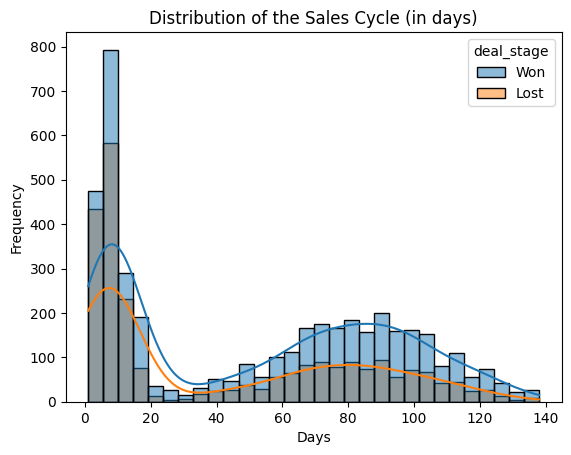

In [25]:
sns.histplot(x=engage_time_df['sales_cycle_duration'], kde=True, bins=30, hue=engage_time_df['deal_stage'])
plt.title('Distribution of the Sales Cycle (in days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

Same frequency variation a long time for both deal stages.

### Distribution of the Sales Cycle by product

In [26]:
engage_time_df['product'].value_counts()

product
GTX Basic         1436
MG Special        1223
GTX Pro           1147
MG Advanced       1084
GTX Plus Basic    1051
GTX Plus Pro       745
GTK 500             25
Name: count, dtype: int64

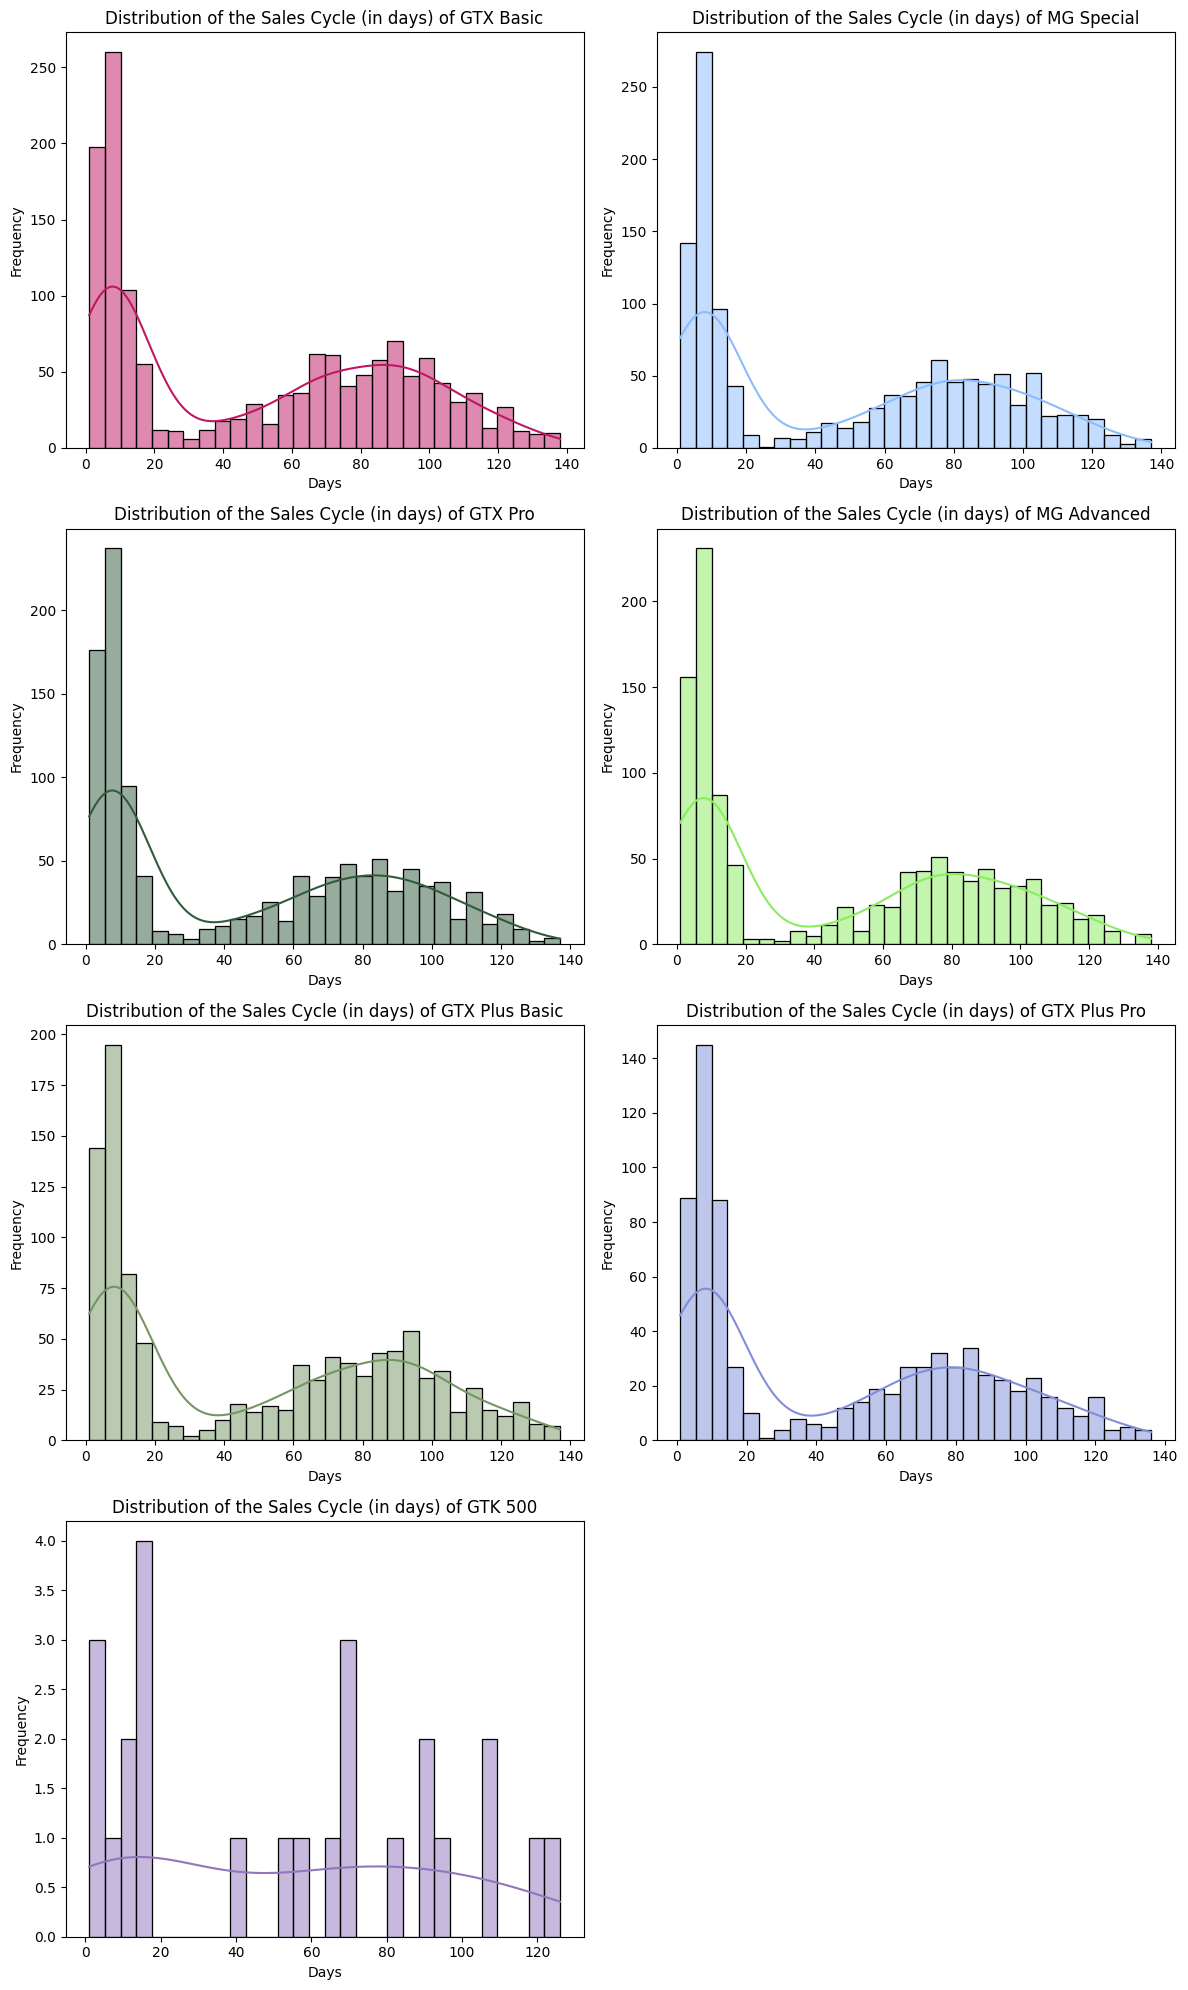

In [27]:
products_from_stages = [
    'GTX Basic', 
    'MG Special',
    'GTX Pro',
    'MG Advanced',
    'GTX Plus Basic',
    'GTX Plus Pro',
    'GTK 500'
]

n_cols = 2
n_rows = (len(products_from_stages) + 1) // n_cols

colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in products_from_stages]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten()  # Achatar a matriz de eixos para facilitar o acesso

for i, product in enumerate(products_from_stages):
    ax = axes[i]
    sns.histplot(
        x=engage_time_df[engage_time_df['product'] == product]['sales_cycle_duration'], 
        kde=True, 
        bins=30, 
        color=colors[i], 
        ax=ax
    )
    ax.set_title(f'Distribution of the Sales Cycle (in days) of {product}', fontsize=12)
    ax.set_xlabel('Days', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

for j in range(len(products_from_stages), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see that, besides the GTK 500, all of them have a similar distribution

## Time Trend Analysis

### Time Trend Analysis by deal stage

In [28]:
time_series_engage_date = engage_time_df.groupby(engage_time_df['engage_date'].dt.to_period('M')).size()
time_series_close_date = engage_time_df.groupby(engage_time_df['close_date'].dt.to_period('M')).size()

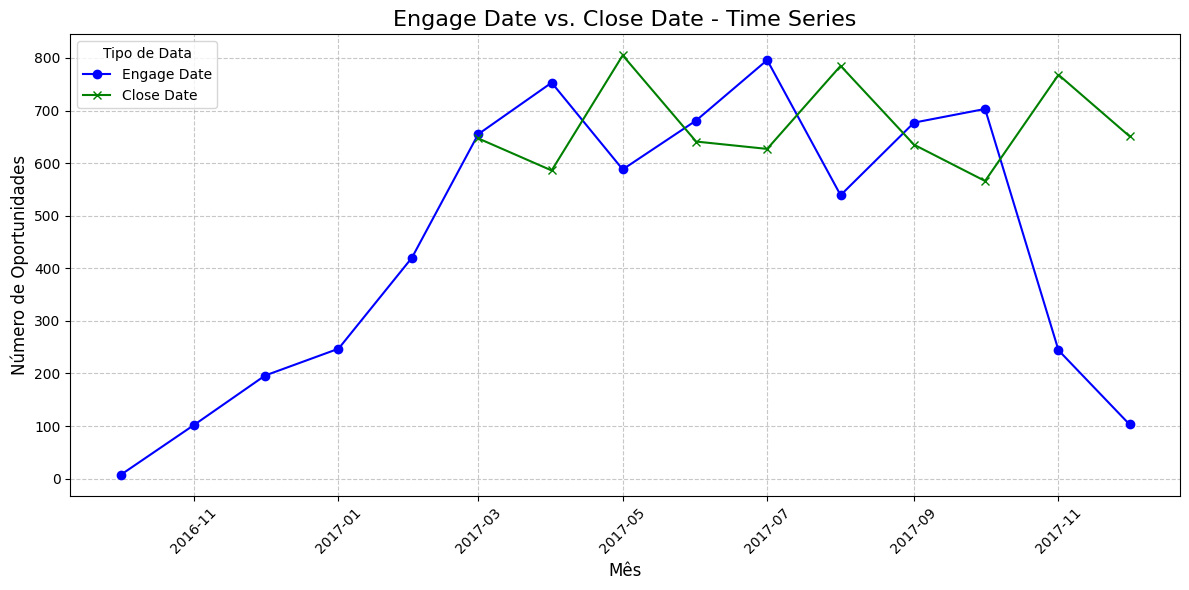

In [29]:
time_series_engage_date.index = time_series_engage_date.index.to_timestamp()
time_series_close_date.index = time_series_close_date.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(time_series_engage_date.index, time_series_engage_date.values, label='Engage Date', color='blue', marker='o')
plt.plot(time_series_close_date.index, time_series_close_date.values, label='Close Date', color='green', marker='x')

plt.title('Engage Date vs. Close Date - Time Series', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Oportunidades', fontsize=12)
plt.legend(title='Tipo de Data', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Time Trend Analysis by deal stage

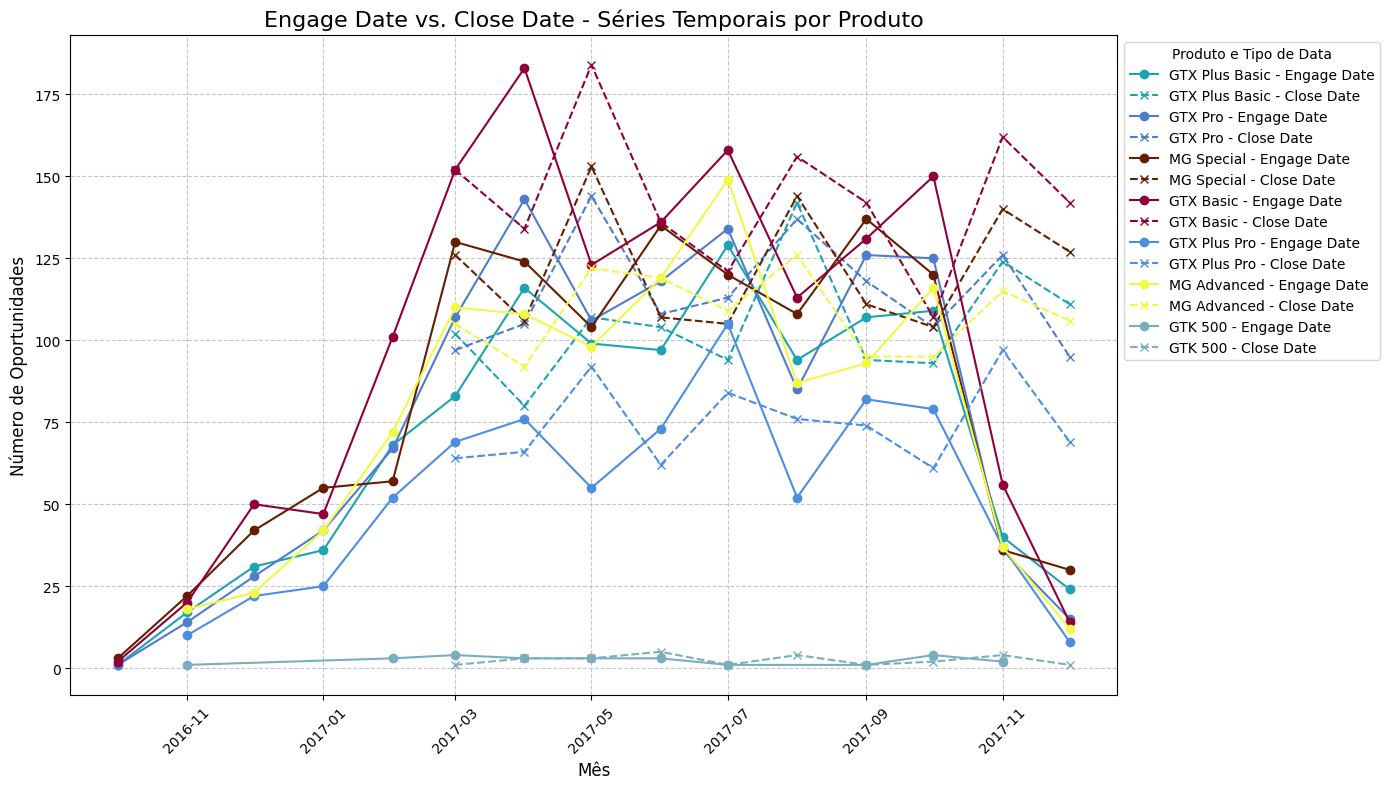

In [30]:
plt.figure(figsize=(14, 8))

products = engage_time_df['product'].unique()
colors = {product: f'#{random.randint(0, 0xFFFFFF):06x}' for product in products}

for product in products:
    product_data = engage_time_df[engage_time_df['product'] == product]

    time_series_engage_date = product_data.groupby(product_data['engage_date'].dt.to_period('M')).size()
    time_series_close_date = product_data.groupby(product_data['close_date'].dt.to_period('M')).size()

    time_series_engage_date.index = time_series_engage_date.index.to_timestamp()
    time_series_close_date.index = time_series_close_date.index.to_timestamp()

    plt.plot(
        time_series_engage_date.index, 
        time_series_engage_date.values, 
        label=f'{product} - Engage Date', 
        color=colors[product], 
        marker='o', 
        linestyle='-'
    )
    plt.plot(
        time_series_close_date.index, 
        time_series_close_date.values, 
        label=f'{product} - Close Date', 
        color=colors[product], 
        marker='x', 
        linestyle='--'
    )

plt.title('Engage Date vs. Close Date - Séries Temporais por Produto', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Oportunidades', fontsize=12)
plt.legend(title='Produto e Tipo de Data', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales agent performance

### Closing Fee per Agent

Closing rate is the number of opportunities won over the total number of opportunities

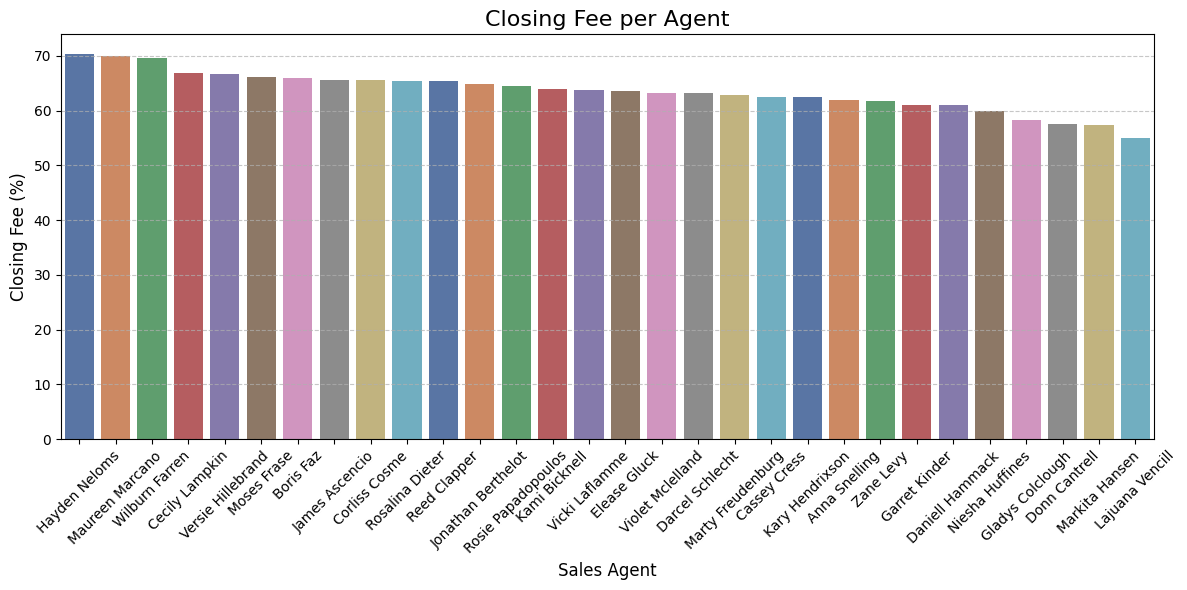

In [31]:
total_opportunities = engage_time_df.groupby('sales_agent')['opportunity_id'].count()
won_opportunities = engage_time_df[engage_time_df['deal_stage'] == 'Won'].groupby('sales_agent')['opportunity_id'].count()

close_rate = (won_opportunities / total_opportunities).fillna(0) * 100

plt.figure(figsize=(12, 6))

fee_per_agent_df = pd.DataFrame(close_rate.sort_values(ascending=False))
sns.barplot(x=fee_per_agent_df.index,
           y=fee_per_agent_df.columns[0], 
           data=fee_per_agent_df,
           palette='deep',
           legend=False)
plt.title('Closing Fee per Agent', fontsize=16)
plt.xlabel('Sales Agent', fontsize=12)
plt.ylabel('Closing Fee (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We can notice that Hayden Neloms have the highest closing fee rate of all agents

## Revenue generated by each agent

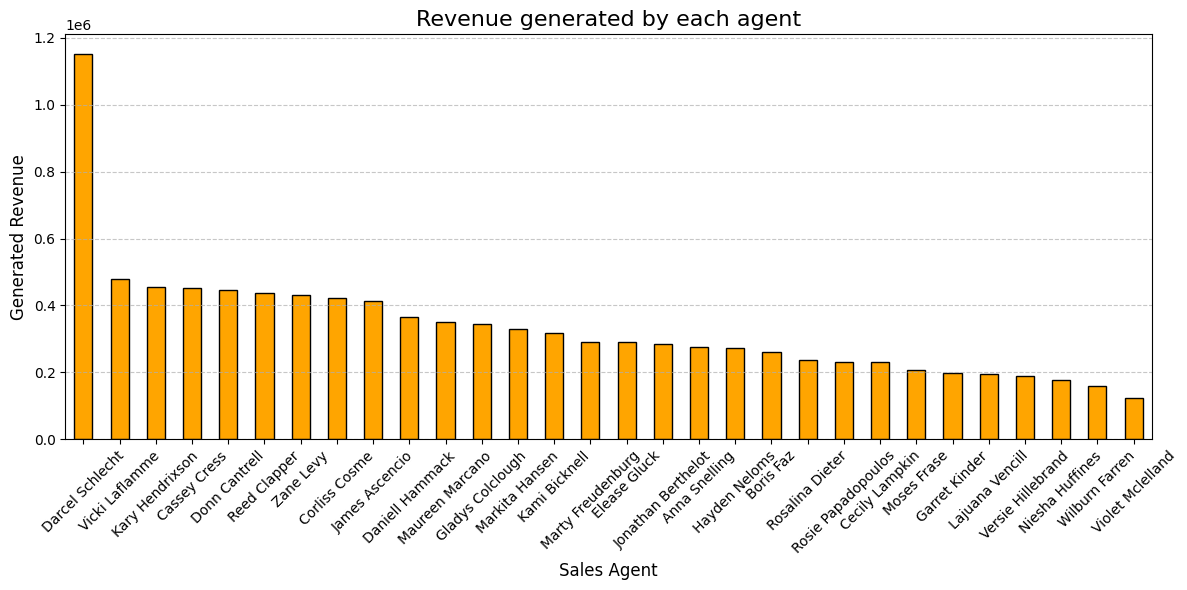

In [33]:
revenue_by_agent = engage_time_df.groupby('sales_agent')['close_value'].sum()

plt.figure(figsize=(12, 6))
revenue_by_agent.sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black')

plt.title('Revenue generated by each agent', fontsize=16)
plt.xlabel('Sales Agent', fontsize=12)
plt.ylabel('Generated Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Darcel Schlecht had the the best revenue of all sales agent, with aproximatly U$1153214 of acumulated revenue

### Outlier closed value analysis by product

product
Gtx Basic           550
Gtx Pro            4821
Mg Special           55
Mg Advanced        3393
Gtx Plus Pro       5482
Gtx Plus Basic     1096
Gtk 500           26768
Name: sales_price, dtype: int64


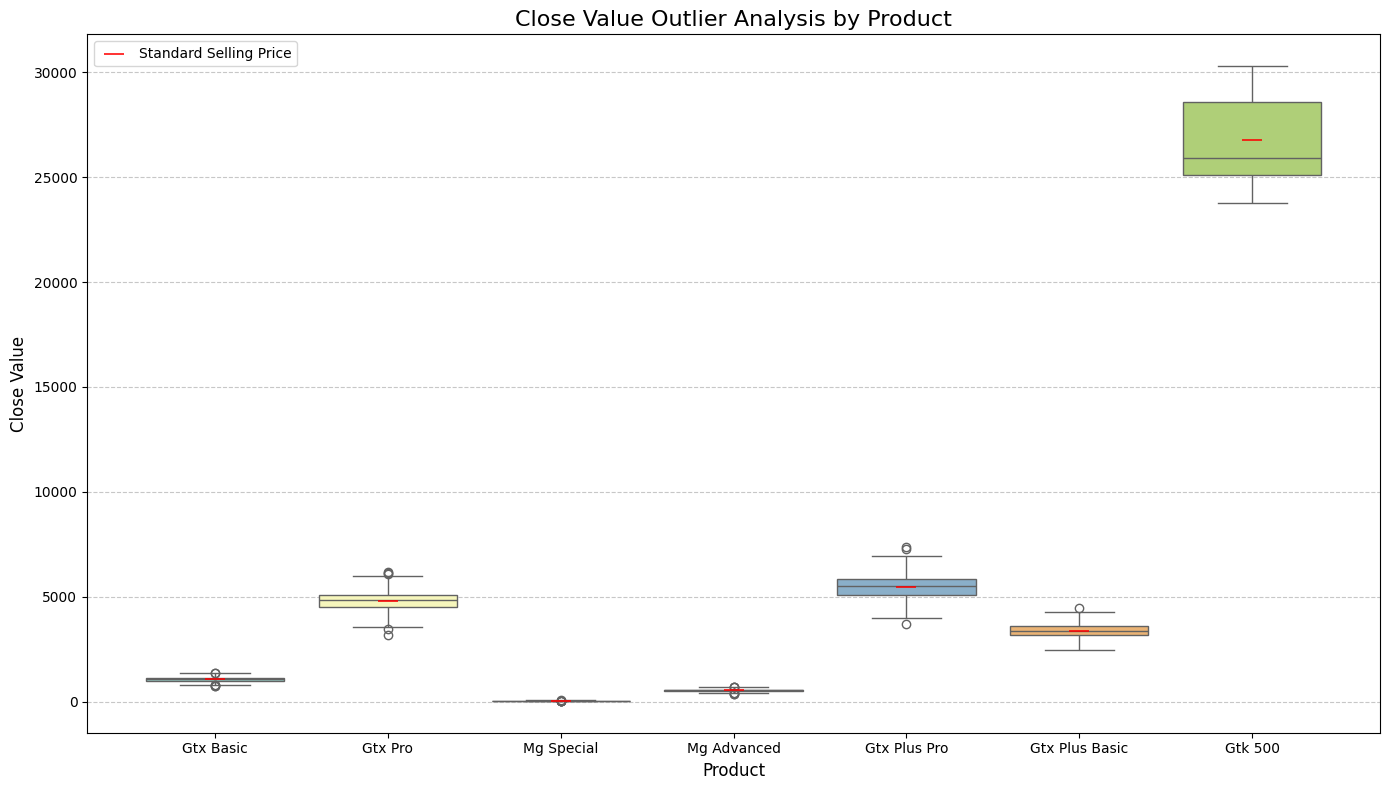

In [37]:
merged_df = pd.merge(engage_time_df[engage_time_df['deal_stage'] == 'Won'], products_df, on='product', how='inner')

outliers_summary = {}
for product, group in merged_df.groupby('product'):
    Q1 = group['close_value'].quantile(0.25)
    Q3 = group['close_value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = group[(group['close_value'] < lower_bound) | (group['close_value'] > upper_bound)]
    outliers_summary[product] = {
        'Total Deals': len(group),
        'Outliers Count': len(outliers),
        'Outliers Percent': (len(outliers) / len(group)) * 100,
        'Outliers Details': outliers
    }

outliers_df = pd.DataFrame(outliers_summary).T
outliers_df.sort_values(by='Outliers Percent', ascending=False, inplace=True)

sales_prices = products_df.set_index('product')['sales_price']
merged_df['product'] = merged_df['product'].str.strip().str.title()
sales_prices.index = sales_prices.index.str.strip().str.title()

print(sales_prices)
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_df, x='product', y='close_value', palette='Set3', showfliers=True)
# sns.violinplot(data=merged_df, x='product', y='close_value', palette='Set3')
sns.scatterplot(x=sales_prices.index, y=sales_prices.values, color='red', marker='_', s=200, label='Standard Selling Price', zorder=3)

plt.title('Close Value Outlier Analysis by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Close Value', fontsize=12)
plt.xticks(ticks=range(len(sales_prices)), labels=sales_prices.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can notice that Gtk 500 has a lower median price if compared with the default sales price based on winning prices

In [38]:
outliers_df

,Total Deals,Outliers Count,Outliers Percent,Outliers Details
GTX Plus Basic,653,6,0.918836,opportunity_id sales_agent p...
MG Special,793,7,0.882724,opportunity_id sales_agent pro...
GTX Basic,915,7,0.765027,opportunity_id sales_agent product...
GTX Pro,729,5,0.685871,opportunity_id sales_agent produ...
GTX Plus Pro,479,3,0.626305,opportunity_id sales_agent prod...
MG Advanced,654,1,0.152905,opportunity_id sales_agent produc...
GTK 500,15,0,0.0,"Empty DataFrame Columns: [opportunity_id, sale..."


We can notice that the product `GTX Plus Basic` have the most outliers, with  just 0.92%

## Customers analysis

In [40]:
accounts_df.columns

Index(['account', 'sector', 'year_established', 'revenue', 'employees',
       'office_location', 'subsidiary_of'],
      dtype='object')

In [41]:
accounts_df.head(10)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN
5,Blackzim,retail,2009,497.11,1588,United States,NaN
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
7,Bubba Gump,software,2002,987.39,2253,United States,NaN
8,Cancity,retail,2001,718.62,2448,United States,NaN
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic


In [42]:
accounts_df.sector.value_counts()

sector
retail                17
technolgy             12
medical               12
marketing              8
finance                8
software               7
entertainment          6
telecommunications     6
services               5
employment             4
Name: count, dtype: int64

### Revenue by sector

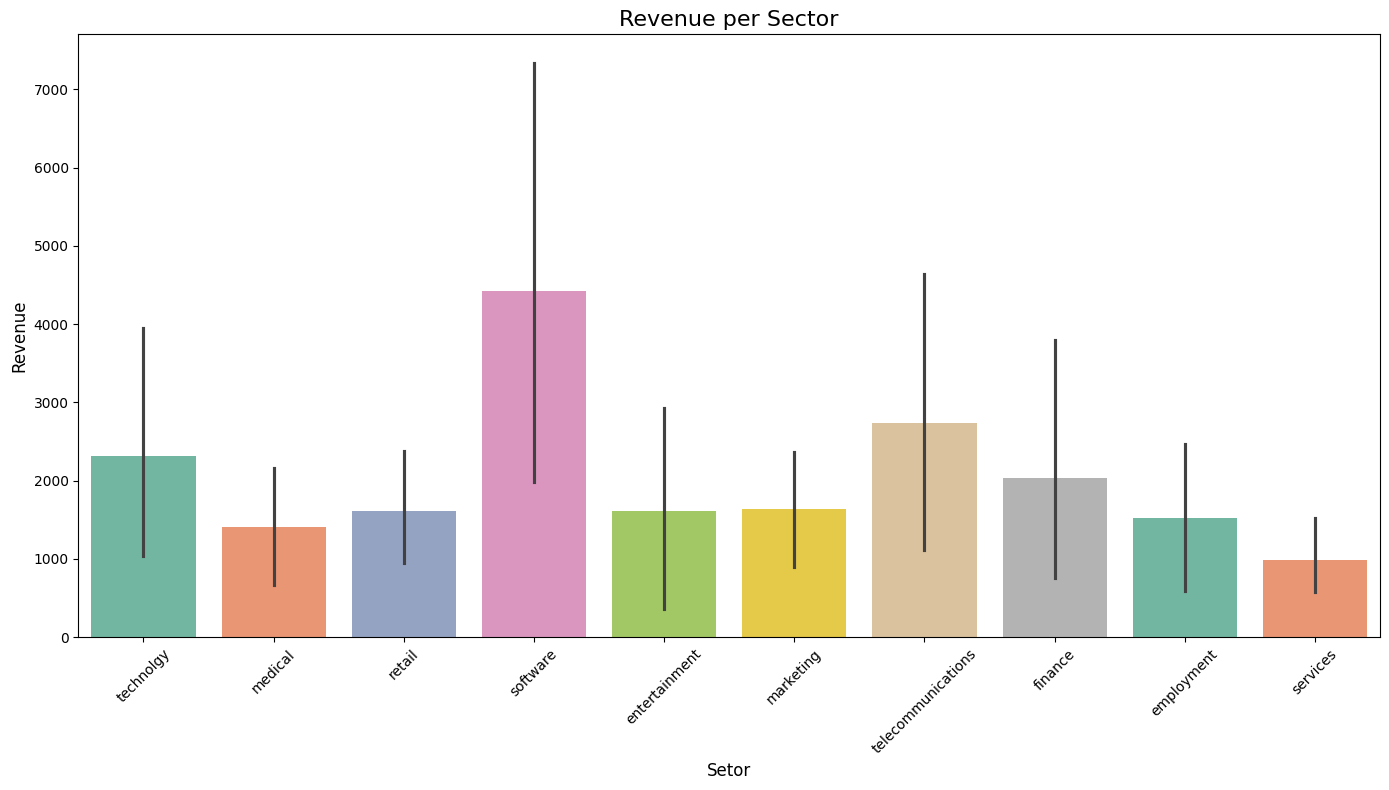

In [43]:
plt.figure(figsize=(14, 8))
sns.barplot(data=accounts_df, x='sector', y='revenue', palette='Set2')
plt.title('Revenue per Sector', fontsize=16)
plt.xlabel('Setor', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Software is the sector with more revenue

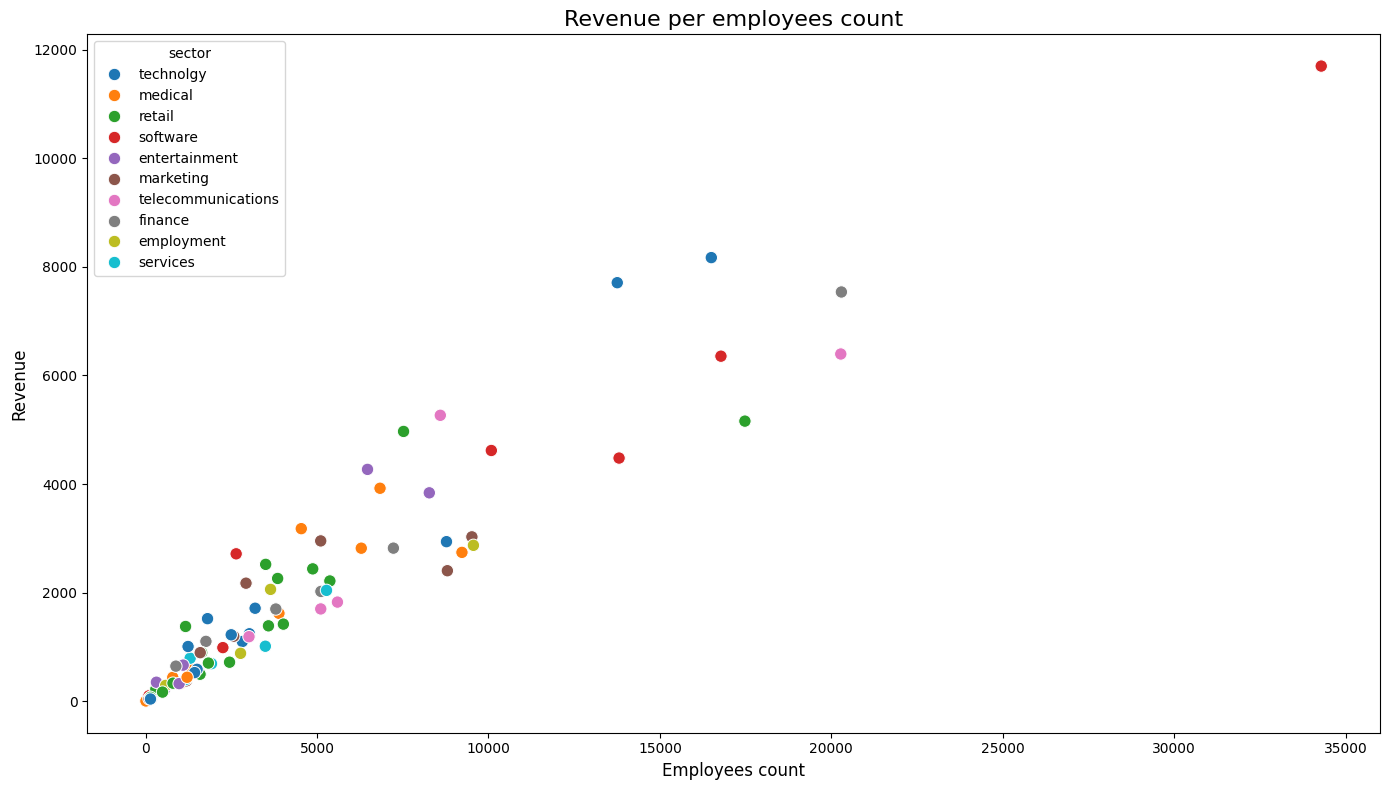

In [45]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=accounts_df, x='employees', y='revenue', color='blue', s=80, hue='sector')
plt.title('Revenue per employees count', fontsize=16)
plt.xlabel('Employees count', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.tight_layout()
plt.show()

### Deal Stages distribution

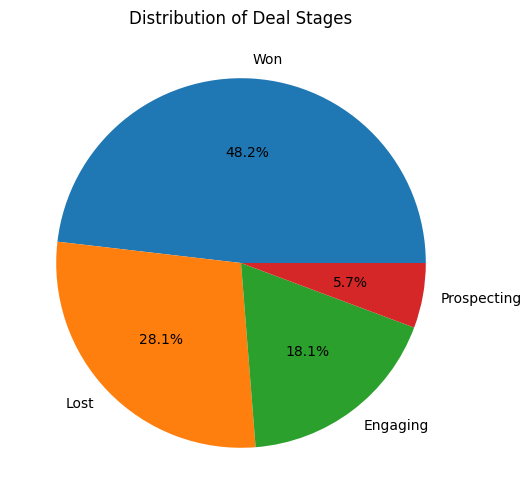

In [46]:
plt.figure(figsize=(10, 6))
sales_pipeline_df['deal_stage'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Deal Stages')
plt.ylabel('')
plt.show()

Half of our dataset is of `Won` deal stage

## Getting all together

In [47]:
print('Sales pipeline columns: ', sales_pipeline_df.columns)
print('Accounts columns: ', accounts_df.columns)
print('Products columns: ', products_df.columns)
print('Sales teams columns: ', sales_teams_df.columns)

Sales pipeline columns:  Index(['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage',
       'engage_date', 'close_date', 'close_value'],
      dtype='object')
Accounts columns:  Index(['account', 'sector', 'year_established', 'revenue', 'employees',
       'office_location', 'subsidiary_of'],
      dtype='object')
Products columns:  Index(['product', 'series', 'sales_price'], dtype='object')
Sales teams columns:  Index(['sales_agent', 'manager', 'regional_office'], dtype='object')


In [48]:
df = (pd.merge(
                pd.merge(
                    pd.merge(sales_pipeline_df, accounts_df, on='account', how='inner'),
                    products_df, on='product', how='inner'),
                sales_teams_df, on='sales_agent', how='inner'))

df

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001,718.62,2448,United States,NaN,GTX,1096,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002,3178.24,4540,United States,NaN,GTX,4821,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001,718.62,2448,United States,NaN,MG,55,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998,2714.90,2641,United States,Acme Corporation,GTX,550,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982,792.46,1299,United States,NaN,GTX,550,Summer Sewald,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,VW8CEV4C,Versie Hillebrand,MG Special,Konmatfix,Prospecting,NaN,NaN,NaN,marketing,1985,375.43,1190,United States,NaN,MG,55,Dustin Brinkmann,Central
7371,KLUS7RVS,Versie Hillebrand,MG Special,Opentech,Prospecting,NaN,NaN,NaN,finance,1994,355.23,853,United States,NaN,MG,55,Dustin Brinkmann,Central
7372,ROM4I2T0,Versie Hillebrand,MG Special,Rundofase,Prospecting,NaN,NaN,NaN,technolgy,1983,1008.06,1238,United States,NaN,MG,55,Dustin Brinkmann,Central
7373,FCNN6UY0,Versie Hillebrand,MG Advanced,Ganjaflex,Prospecting,NaN,NaN,NaN,retail,1995,5158.71,17479,Japan,NaN,MG,3393,Dustin Brinkmann,Central


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    7375 non-null   object 
 1   sales_agent       7375 non-null   object 
 2   product           7375 non-null   object 
 3   account           7375 non-null   object 
 4   deal_stage        7375 non-null   object 
 5   engage_date       7212 non-null   object 
 6   close_date        6711 non-null   object 
 7   close_value       6711 non-null   float64
 8   sector            7375 non-null   object 
 9   year_established  7375 non-null   int64  
 10  revenue           7375 non-null   float64
 11  employees         7375 non-null   int64  
 12  office_location   7375 non-null   object 
 13  subsidiary_of     1292 non-null   object 
 14  series            7375 non-null   object 
 15  sales_price       7375 non-null   int64  
 16  manager           7375 non-null   object 


## Feature Engineering

Feature engineering is a critical step in any data analysis or predictive modeling project, especially in the context of CRM and sales pipeline analysis for a hardware company. In this scenario, feature engineering helps transform raw data into insightful metrics that can reveal customer behaviors, sales cycle efficiency, and agent performance. By crafting new features you enhance the model’s ability to segment customers, forecast revenue, and ultimately improve business strategies. This process not only simplifies the complexity of the data but also enables the extraction of actionable insights that can lead to more effective customer engagement and targeted sales efforts.

Below is a breakdown feature engineering steps that can be done with our database:

- Calculate Sales Cycle Duration
- Map Sales Agent Close Rate
- Calculate Opportunities per Account
- Calculate Opportunities per Sales Agent, etc

In the nexts topics of this notebook it will be presented more complex feature engineering tecniques for our final enriched dataset.

In [57]:
df['engage_date'] = pd.to_datetime(df['engage_date'])
df['close_date'] = pd.to_datetime(df['close_date'])
df['year_established'] = df['year_established'].astype(str)

df['sales_cycle_duration'] = (df['close_date'] - df['engage_date']).dt.days
df['agent_close_rate'] = df['sales_agent'].map(close_rate)
df['opportunities_per_account'] = df.groupby('account')['opportunity_id'].transform('count')
df['opportunities_per_sales_agent'] = df.groupby('sales_agent')['opportunity_id'].transform('count')

In [58]:
df

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,...,office_location,subsidiary_of,series,sales_price,manager,regional_office,sales_cycle_duration,agent_close_rate,opportunities_per_account,opportunities_per_sales_agent
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001,...,United States,NaN,GTX,1096,Dustin Brinkmann,Central,132.0,66.153846,101,216
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002,...,United States,NaN,GTX,4821,Melvin Marxen,Central,137.0,63.110307,119,613
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001,...,United States,NaN,MG,55,Melvin Marxen,Central,133.0,63.110307,101,613
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998,...,United States,Acme Corporation,GTX,550,Dustin Brinkmann,Central,135.0,66.153846,121,216
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982,...,United States,NaN,GTX,550,Summer Sewald,West,128.0,61.685824,87,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,VW8CEV4C,Versie Hillebrand,MG Special,Konmatfix,Prospecting,NaT,NaT,NaN,marketing,1985,...,United States,NaN,MG,55,Dustin Brinkmann,Central,NaN,66.666667,74,292
7371,KLUS7RVS,Versie Hillebrand,MG Special,Opentech,Prospecting,NaT,NaT,NaN,finance,1994,...,United States,NaN,MG,55,Dustin Brinkmann,Central,NaN,66.666667,60,292
7372,ROM4I2T0,Versie Hillebrand,MG Special,Rundofase,Prospecting,NaT,NaT,NaN,technolgy,1983,...,United States,NaN,MG,55,Dustin Brinkmann,Central,NaN,66.666667,104,292
7373,FCNN6UY0,Versie Hillebrand,MG Advanced,Ganjaflex,Prospecting,NaT,NaT,NaN,retail,1995,...,Japan,NaN,MG,3393,Dustin Brinkmann,Central,NaN,66.666667,81,292


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   opportunity_id                 7375 non-null   object        
 1   sales_agent                    7375 non-null   object        
 2   product                        7375 non-null   object        
 3   account                        7375 non-null   object        
 4   deal_stage                     7375 non-null   object        
 5   engage_date                    7212 non-null   datetime64[ns]
 6   close_date                     6711 non-null   datetime64[ns]
 7   close_value                    6711 non-null   float64       
 8   sector                         7375 non-null   object        
 9   year_established               7375 non-null   object        
 10  revenue                        7375 non-null   float64       
 11  employees        

### Filtering the target variable

In [60]:
df['deal_stage'].value_counts()

deal_stage
Won            4238
Lost           2473
Engaging        501
Prospecting     163
Name: count, dtype: int64

In [61]:
df_won = df[df['deal_stage'].isin(['Won'])]
df_won['deal_stage'].value_counts()

deal_stage
Won    4238
Name: count, dtype: int64

In [62]:
df_won.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 7211
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   opportunity_id                 4238 non-null   object        
 1   sales_agent                    4238 non-null   object        
 2   product                        4238 non-null   object        
 3   account                        4238 non-null   object        
 4   deal_stage                     4238 non-null   object        
 5   engage_date                    4238 non-null   datetime64[ns]
 6   close_date                     4238 non-null   datetime64[ns]
 7   close_value                    4238 non-null   float64       
 8   sector                         4238 non-null   object        
 9   year_established               4238 non-null   object        
 10  revenue                        4238 non-null   float64       
 11  employees             

Just 'subsidiary_of' variable with missing values

# RFM Analysis

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

RFM factors illustrate these facts:

- The more recent the purchase, the more responsive the customer is to promotions
- The more frequently the customer buys, the more engaged and satisfied they are
- Monetary value differentiates heavy spenders from low-value purchasers

A good segmentation of customers can lead to a more efective marketing guidance for the company.

If the focus is on optimizing retention and maximizing the value of existing customers, RFM analysis with only `Won` customers is more appropriate. If the goal is to understand the sales process and explore opportunities to win back lost customers, including `Lost` customers in the RFM analysis can provide valuable insights into their behavior, helping to improve the sales funnel and recovery strategies.

OBS: This specific RFM analysis was only aplied to customers that the `deal_stage` is `Won`. It can be aplied to `Lost` deal stages, but we will focous only on `Won` deal stages for now.

In [63]:
df_won.close_date.max()

Timestamp('2017-12-31 00:00:00')

Junuary 1st of 2018 will be the reference day for recency calculation

In [64]:
from datetime import datetime, timedelta

today_date = datetime(2018,1,1)

In [65]:
rfm = df_won.groupby('account').agg({
    'close_date': ['min', 'max', lambda x: (today_date - x.max()).days],
    'account': 'count',
    'close_value': 'sum',
    'office_location': 'first',
    'product': 'first',
    'revenue': 'first',
})
rfm = rfm.reset_index()
rfm.columns = ['account', 'first_purchase', 'last_purchase', 'Recency', 'Frequency', 'Monetary', 'office_location', 'product', 'revenue']

rfm.head()

,account,first_purchase,last_purchase,Recency,Frequency,Monetary,office_location,product,revenue
0,Acme Corporation,2017-03-01,2017-12-27,5,34,101744.0,United States,GTX Basic,1100.04
1,Betasoloin,2017-03-01,2017-12-28,4,34,97036.0,United States,GTX Plus Pro,251.41
2,Betatech,2017-03-08,2017-12-29,3,53,107408.0,Kenya,GTX Plus Pro,647.18
3,Bioholding,2017-03-10,2017-12-28,4,50,90991.0,Philipines,MG Special,587.34
4,Bioplex,2017-03-04,2017-12-16,16,31,67393.0,United States,MG Special,326.82


In [66]:
rfm.Monetary.value_counts()

Monetary
163339.0    2
101744.0    1
107408.0    1
97036.0     1
67393.0     1
           ..
86690.0     1
76684.0     1
138339.0    1
78237.0     1
116394.0    1
Name: count, Length: 84, dtype: int64

Using `pd.cut` to get intervals of same size

In [67]:
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm

,account,first_purchase,last_purchase,Recency,Frequency,Monetary,office_location,product,revenue,R_Score,F_Score,M_Score,RFM_Score
0,Acme Corporation,2017-03-01,2017-12-27,5,34,101744.0,United States,GTX Basic,1100.04,4,1,1,411
1,Betasoloin,2017-03-01,2017-12-28,4,34,97036.0,United States,GTX Plus Pro,251.41,4,1,1,411
2,Betatech,2017-03-08,2017-12-29,3,53,107408.0,Kenya,GTX Plus Pro,647.18,4,2,1,421
3,Bioholding,2017-03-10,2017-12-28,4,50,90991.0,Philipines,MG Special,587.34,4,2,1,421
4,Bioplex,2017-03-04,2017-12-16,16,31,67393.0,United States,MG Special,326.82,3,1,1,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Zencorporation,2017-03-12,2017-12-18,14,33,86690.0,China,GTX Basic,40.79,3,1,1,311
81,Zoomit,2017-03-09,2017-12-28,4,33,76684.0,United States,GTX Basic,324.19,4,1,1,411
82,Zotware,2017-03-15,2017-12-30,2,47,138339.0,United States,MG Advanced,4478.47,4,2,2,422
83,Zumgoity,2017-03-02,2017-12-27,5,36,78237.0,United States,GTX Plus Basic,441.08,4,1,1,411


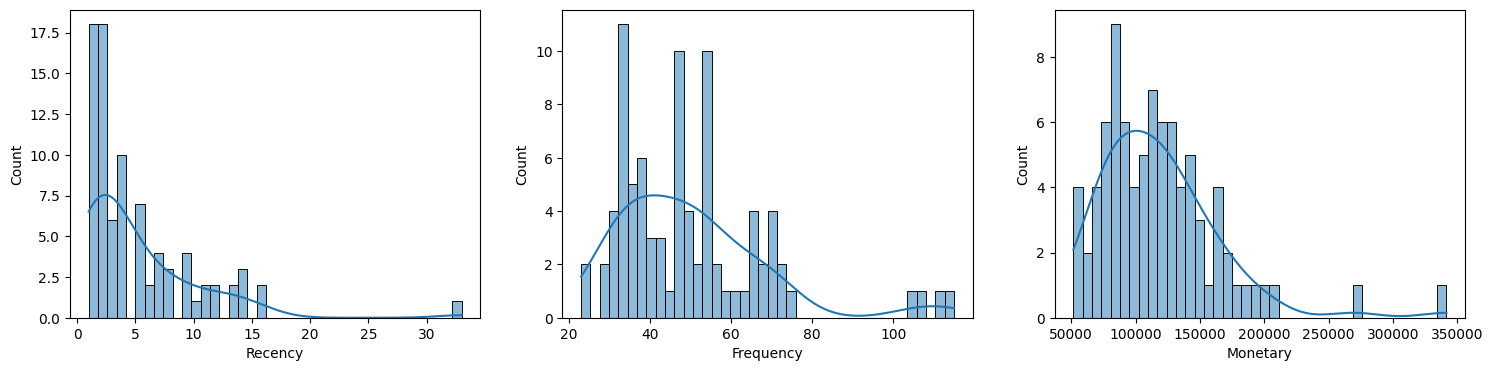

In [68]:
cols = ['Recency', 'Frequency', 'Monetary']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for i, col in enumerate(cols):
    sns.histplot(data=rfm, x=col, kde=True, bins=40, ax=axes[i])

plt.show()

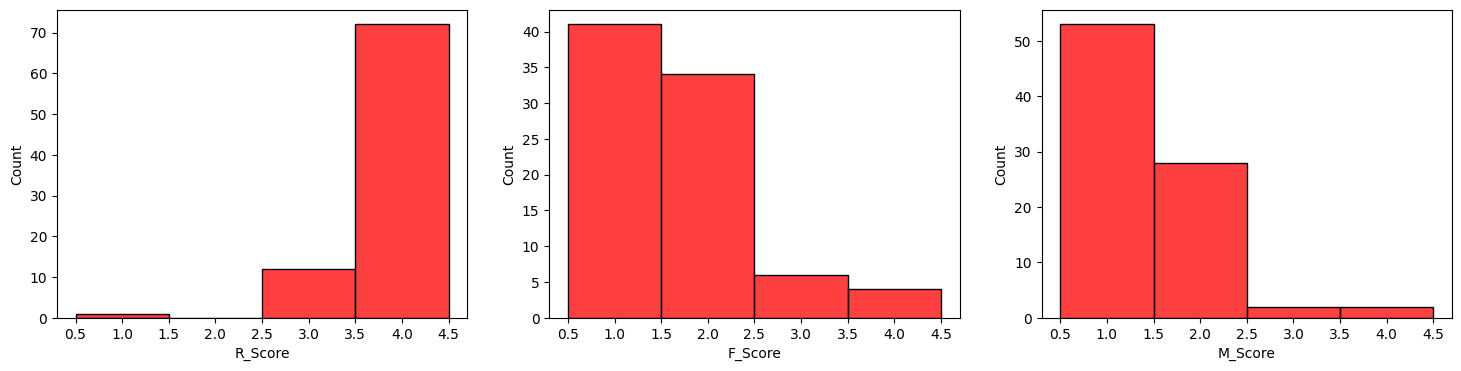

In [69]:
cols = ['R_Score', 'F_Score', 'M_Score']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

for i, col in enumerate(cols):
    sns.histplot(data=rfm, x=col, ax=axes[i], color='red')

plt.show()

### Clustering evaluation function

In [70]:
def ratio_info(df, col_name):
    ratio_df = pd.DataFrame({col_name: df[col_name].value_counts(),
                            "Ratio": 100 * df[col_name].value_counts() / len(df)})
    
    ratio_df

    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df,
                       x=col_name,
                       palette = 'Set3')

    total = len(df[col_name])

    for patch in ax.patches:
        percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
        x = patch.get_x() + patch.get_width() / 2 - 0.17
        y = patch.get_y() + patch.get_height() * 1.005
        ax.annotate(percentage, (x, y), size = 14)

    plt.title('Number of Customers by Segments', size = 16)
    plt.xlabel('Segment', size = 14)
    plt.ylabel('Count', size = 14)
    plt.xticks(rotation=30)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.show()

## K-means Clustering RFM analysis for customers segmentations

K-means clustering is a powerful unsupervised learning algorithm that can be very useful for customer segmentation when working with RFM data. Here's how it works and why it's effective in this context:

**Grouping Similar Customers:**
- K-means partitions customers into a predetermined number of clusters (k) based on their Recency, Frequency, and Monetary values. By grouping together customers with similar behaviors, you can identify segments that share common characteristics—such as those who purchase frequently or those with high transaction values.

**Identifying Distinct Segments:**
- With RFM data, the differences between customer groups can be subtle. K-means helps to uncover these patterns by minimizing the within-cluster variance. This means that each cluster will contain customers whose recency, frequency, and monetary values are close to one another, making it easier to define distinct segments.

**Disavantages:**
- Ambiguous result of clusters, so the decision maker would not have a real ideia of why the custumers are segmented this way. But overwall, it can be a good solution of semetation

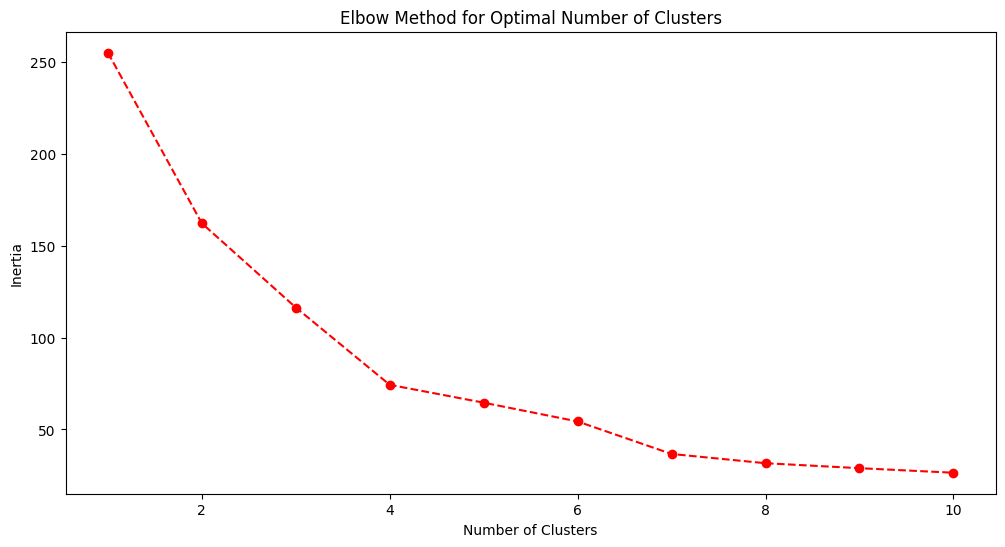

In [75]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

By analysing the elbow graphic, you can see that the ideal number of cluster is 4.

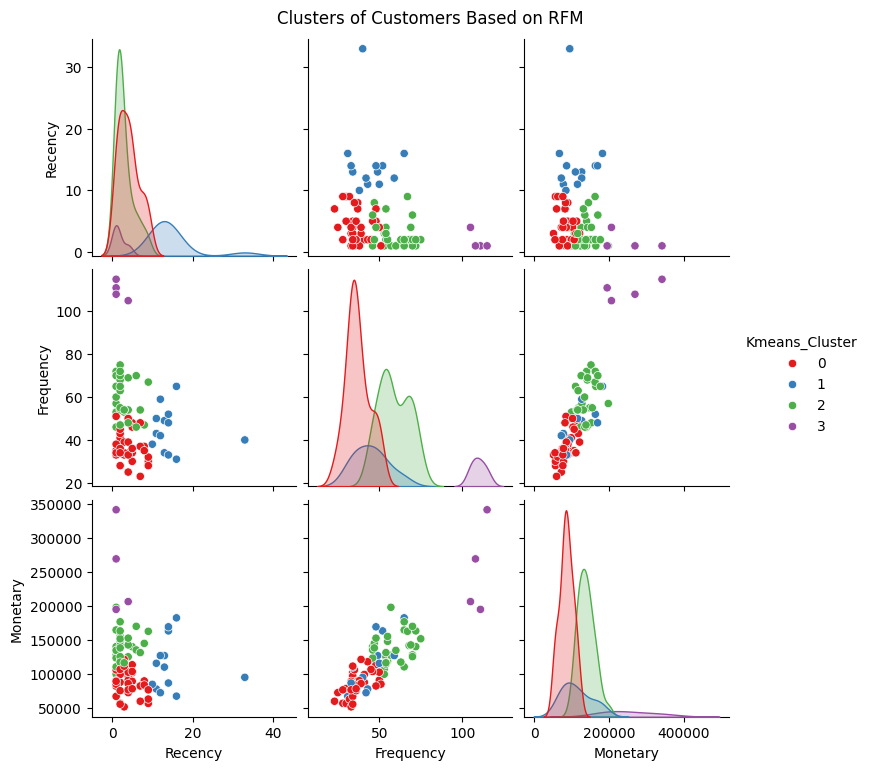


Centroids of the clusters in original scale:


,Recency,Frequency,Monetary
0,4.083333,36.916667,85823.777778
1,14.538462,44.923077,113798.230769
2,2.906250,58.937500,138263.562500
3,1.750000,109.750000,253016.750000


In [77]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Kmeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

sns.pairplot(rfm, vars=['Recency', 'Frequency', 'Monetary'], hue='Kmeans_Cluster', palette='Set1')
plt.suptitle('Clusters of Customers Based on RFM', y=1.02)
plt.show()

centroids = kmeans.cluster_centers_

centroids_original = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_original, columns=['Recency', 'Frequency', 'Monetary'])
print()
print("Centroids of the clusters in original scale:")
centroids_df

### Metrics and Results

In [78]:
rfm.groupby("Kmeans_Cluster").agg({"Recency": ["count", "mean"],
                            "Frequency": ["count", "mean"],
                            "Monetary": ["count", "mean"]})

Recency            Frequency             Monetary  \
                 count       mean     count        mean    count   
Kmeans_Cluster                                                     
0                   36   4.083333        36   36.916667       36   
1                   13  14.538462        13   44.923077       13   
2                   32   2.906250        32   58.937500       32   
3                    4   1.750000         4  109.750000        4   

                               
                         mean  
Kmeans_Cluster                 
0                85823.777778  
1               113798.230769  
2               138263.562500  
3               253016.750000

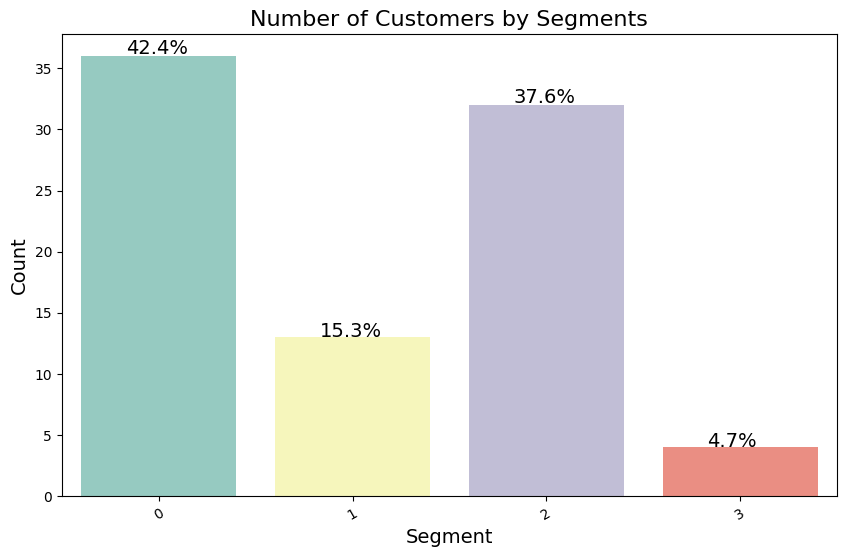

In [79]:
ratio_info(rfm, "Kmeans_Cluster")

In [80]:
print('K-Means RFM Model Evaluation '.center(70, '='))
X = rfm[['Recency', 'Frequency', 'Monetary']]
labels = rfm['Kmeans_Cluster']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

====================K-Means RFM Model Evaluation =====================
Number of Observations: 85
Number of Segments: 4
Silhouette Score: 0.239
Calinski Harabasz Score: 57.241
Davies Bouldin Score: 1.551 


## Agglomerative Clustering RFM analysis for customers segmentation

Agglomerative clustering, a type of hierarchical clustering, is especially useful for customer segmentation using RFM (Recency, Frequency, Monetary) data. Unlike partitioning methods that require you to predefine the number of clusters, agglomerative clustering builds a hierarchy of clusters, allowing you to explore the data at various levels of granularity. Here’s why it can be effective:

**Building a Hierarchical Structure:**
- Starting with each customer as its own cluster, the algorithm iteratively merges the closest clusters based on a defined distance metric. This process continues until all points are merged into one overarching cluster, forming a tree-like structure known as a dendrogram.

**Visual Insights Through Dendrograms:**
- The dendrogram provides a visual representation of how clusters are formed and merged. By examining the dendrogram, you can determine the natural divisions in your customer base. For instance, by “cutting” the dendrogram at a certain level, you can identify the optimal number of customer segments based on their RFM values.

**Flexibility in Cluster Determination:**
- Because agglomerative clustering doesn’t require a preset number of clusters, it allows you to explore the data without making initial assumptions. This flexibility is particularly beneficial when the natural grouping of customers is not obvious, enabling you to uncover both broad segments and nested sub-segments.

The following cell will show us a 4 dendograms. Our job is to choose best method for calulate the distances between clusters at the merging stage (`Z`) that fits well in our data. Here is the description of the `z` parameter:

- `ward`: If your goal is to create compact, homogeneous clusters, ward method is usually the best choice.
- `complete`: If you want to avoid large clusters, complete method may be more suitable, although it can generate more dispersed clusters.
- `single`: If your data has a clear hierarchical structures and search for connected clusters.
- `average`: Is a intermediate choice, balancing the formation of compact and dispersed clusters.

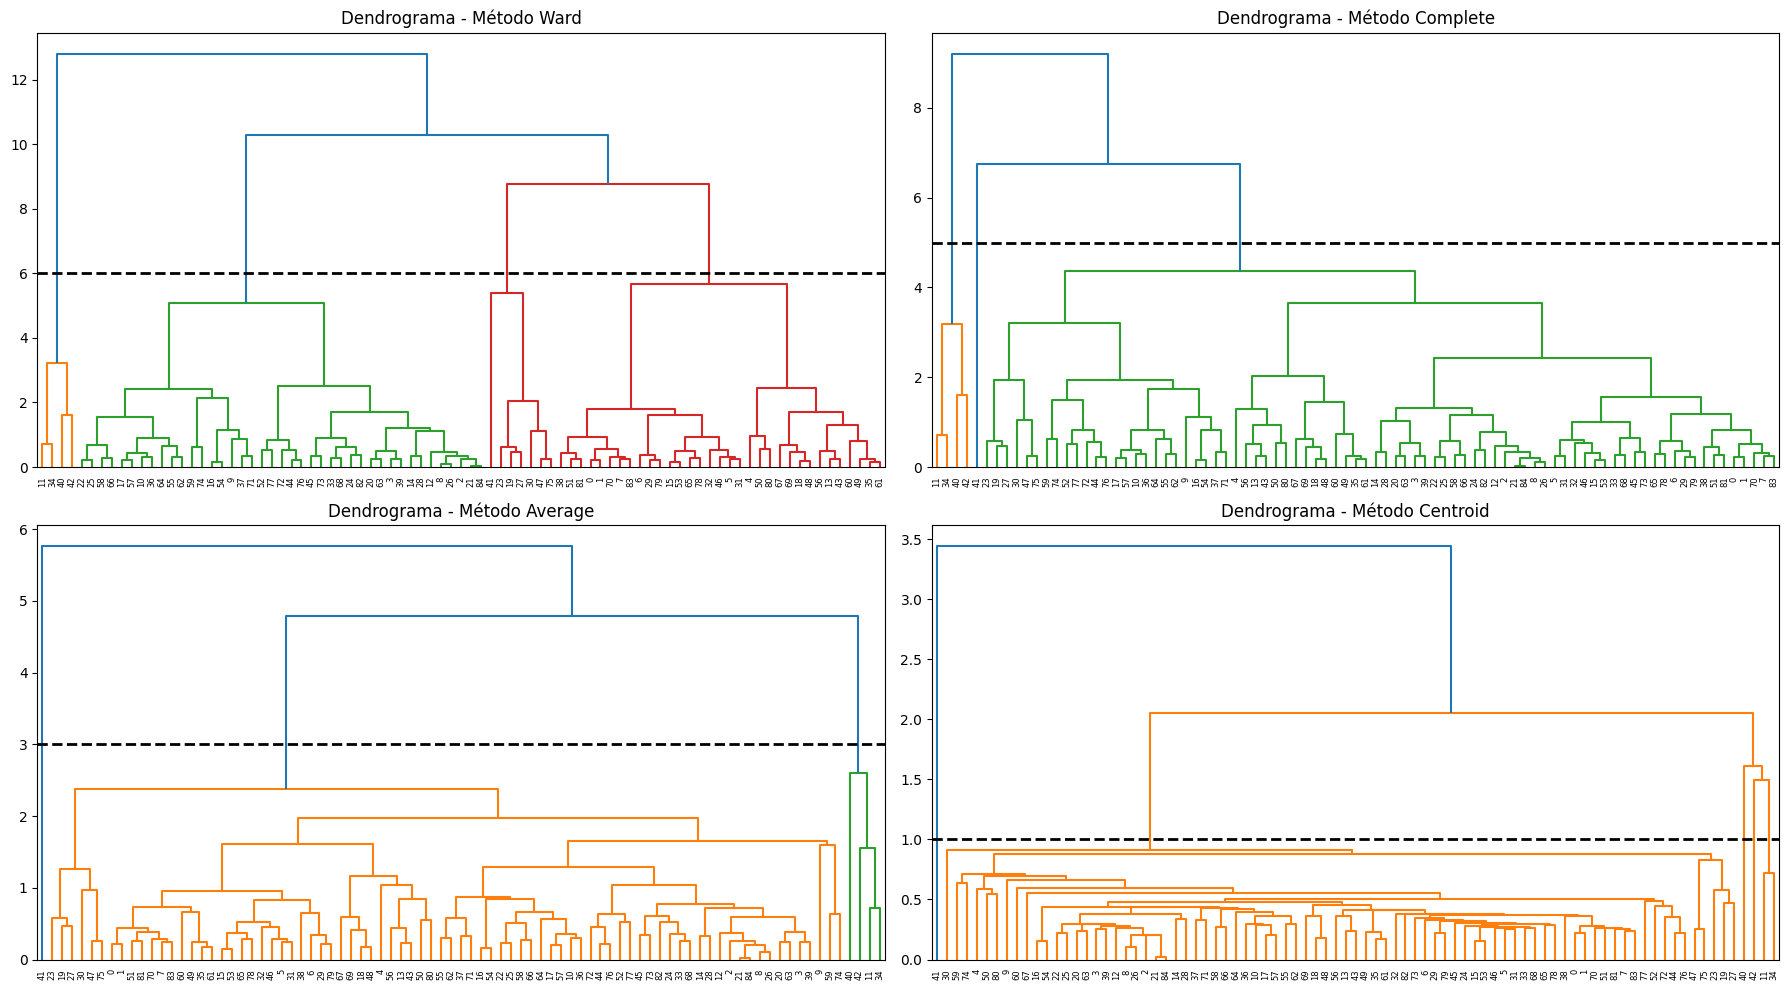

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

Z_ward = linkage(rfm_scaled, method='ward')
dendrogram(Z_ward, ax=axes[0, 0])
axes[0, 0].set_title("Dendrograma - Método Ward")
axes[0, 0].axhline(y=6, color='black', linestyle='--', linewidth=2)

Z_complete = linkage(rfm_scaled, method='complete')
dendrogram(Z_complete, ax=axes[0, 1])
axes[0, 1].set_title("Dendrograma - Método Complete")
axes[0, 1].axhline(y=5, color='black', linestyle='--', linewidth=2)

Z_average = linkage(rfm_scaled, method='average')
dendrogram(Z_average, ax=axes[1, 0])
axes[1, 0].set_title("Dendrograma - Método Average")
axes[1, 0].axhline(y=3, color='black', linestyle='--', linewidth=2)

Z_centroid = linkage(rfm_scaled, method='single')
dendrogram(Z_centroid, ax=axes[1, 1])
axes[1, 1].set_title("Dendrograma - Método Centroid")
axes[1, 1].axhline(y=1, color='black', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

The important thing to note is when an abrupt increase in the distance (Euclidean distance) between the clusters occour. This increase, indicates that the clusters are moving apart more significantly, which generally indicates that the separation between the groups is clearer. This specificy behavior begins with a Eucliadian Distance of:
- 6, if we look at the dendogram of the `ward` method.
- 5, if we look at the dendogram of the `complete` method.
- 3, if we look at the dendogram of the `average` method.
- 1, if we look at the dendogram of the `single` method.

Ward's method is often preferred due to its focus on minimizing within-cluster variance. This approach typically leads to more compact and spherical clusters, making it suitable for data with a natural clustering structure. By minimizing the increase in variance at each merge step, Ward's method tends to produce clusters that are internally homogeneous and well-separated, even in the presence of some noise or outliers. This makes it a robust choice in our case (Customer segmentation).

In [82]:
clusters = fcluster(Z_ward, t=6, criterion='distance')

num_clusters = len(np.unique(clusters))
num_clusters

4

A Euclidian distance of 3 generates 3 clusters

In [83]:
model = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
rfm['Agg_Cluster'] = model.fit_predict(rfm_scaled)

### Metrics and Results

In [84]:
rfm.groupby("Agg_Cluster").agg({"Recency": ["count", "mean"],
                            "Frequency": ["count", "mean"],
                            "Monetary": ["count", "mean"]})

Recency            Frequency             Monetary               
              count       mean     count        mean    count           mean
Agg_Cluster                                                                 
0                33   5.878788        33   34.666667       33   79862.393939
1                 7  16.142857         7   51.857143        7  140007.000000
2                41   2.975610        41   55.902439       41  131169.731707
3                 4   1.750000         4  109.750000        4  253016.750000

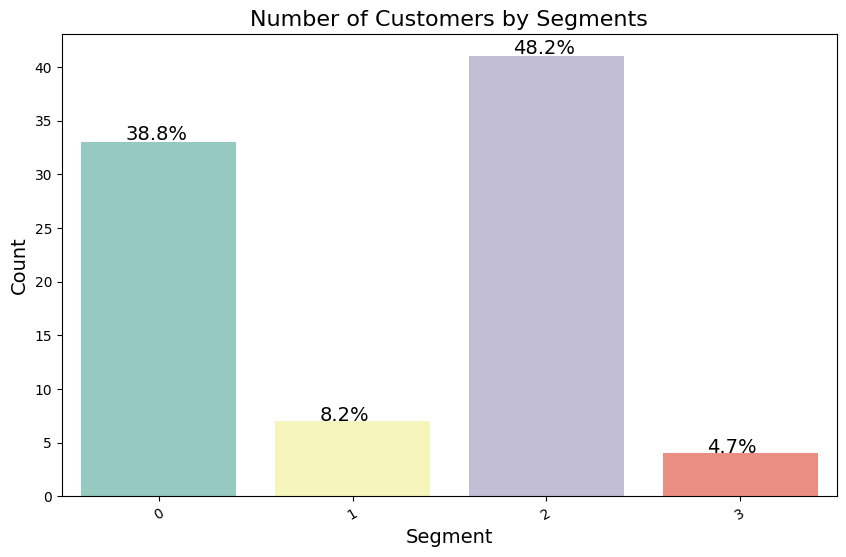

In [85]:
ratio_info(rfm, "Agg_Cluster")

In [86]:
print('Agglomerative Clustering RFM Model Evaluation '.center(70, '='))
X = rfm[['Recency', 'Frequency', 'Monetary']]
labels = rfm['Agg_Cluster']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

============Agglomerative Clustering RFM Model Evaluation ============
Number of Observations: 85
Number of Segments: 4
Silhouette Score: 0.264
Calinski Harabasz Score: 70.371
Davies Bouldin Score: 2.982 


## HDBSCAN Clustering with UMAP for RFM analysis of customers segmentation

Using HDBSCAN together with UMAP for customer segmentation on RFM data is a powerful approach that combines advanced dimensionality reduction with robust density-based clustering. Here’s why this combination can be effective:

**Dimensionality Reduction with UMAP:**
- UMAP (Uniform Manifold Approximation and Projection) is used to reduce the high-dimensional RFM space into a lower-dimensional representation—often 2D or 3D—while preserving both local and global structures in the data. This makes it easier to visualize and understand the underlying relationships between customers based on their Recency, Frequency, and Monetary values.

**Robust Clustering with HDBSCAN:**
- HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) excels in clustering data with varying densities and shapes. Unlike traditional methods, HDBSCAN does not require you to specify the number of clusters upfront. It identifies clusters based on the density of points and is particularly adept at recognizing and filtering out noise or outliers, which can be common in real-world CRM datasets.

**Complementary Strengths:**
- When UMAP reduces the complexity of the RFM data, HDBSCAN can effectively operate on this simplified space to uncover natural groupings of customers. This combination allows for the detection of subtle patterns and segments that might be missed by more rigid clustering techniques.

**Outlier Identification:**
- HDBSCAN’s ability to flag noise and outliers is valuable. It helps in identifying customers who do not fit neatly into any segment, allowing businesses to investigate these cases further and decide whether they represent unique opportunities or require different handling.

/home/diogo/Documentos/Projetos/ai_analysis_crm/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



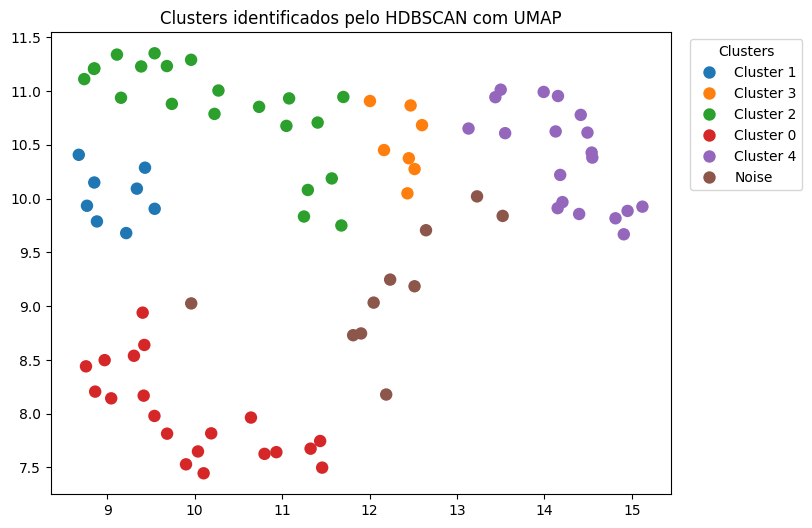

In [87]:
from sklearn.cluster import HDBSCAN
import umap

reducer = umap.UMAP(random_state=42, n_components=2)
embedding = reducer.fit_transform(rfm_scaled)
clusterer = HDBSCAN(min_cluster_size=5, min_samples=4)
labels = clusterer.fit_predict(embedding)
u, counts = np.unique(labels, return_counts=True)

rfm['HDBSCAN_Cluster'] = [f"Cluster {label}" if label != -1 else "Noise" for label in labels]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    hue=rfm['HDBSCAN_Cluster'],
    palette='tab10',
    s=80, 
    edgecolor='none'
)
plt.title('Clusters identificados pelo HDBSCAN com UMAP')
plt.legend(title="Clusters", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

### Metrics and Results

In [88]:
rfm.groupby("HDBSCAN_Cluster").agg({"Recency": ["count", "mean"],
                            "Frequency": ["count", "mean"],
                            "Monetary": ["count", "mean"]})

Recency            Frequency            Monetary  \
                  count       mean     count       mean    count   
HDBSCAN_Cluster                                                    
Cluster 0            20  12.300000        20  40.300000       20   
Cluster 1             8   4.500000         8  33.375000        8   
Cluster 2            21   2.285714        21  39.904762       21   
Cluster 3             7   2.571429         7  53.857143        7   
Cluster 4            19   1.894737        19  75.631579       19   
Noise                10   5.200000        10  51.300000       10   

                                
                          mean  
HDBSCAN_Cluster                 
Cluster 0         99594.400000  
Cluster 1         85007.875000  
Cluster 2         92296.571429  
Cluster 3        114140.714286  
Cluster 4        168696.789474  
Noise            139113.100000

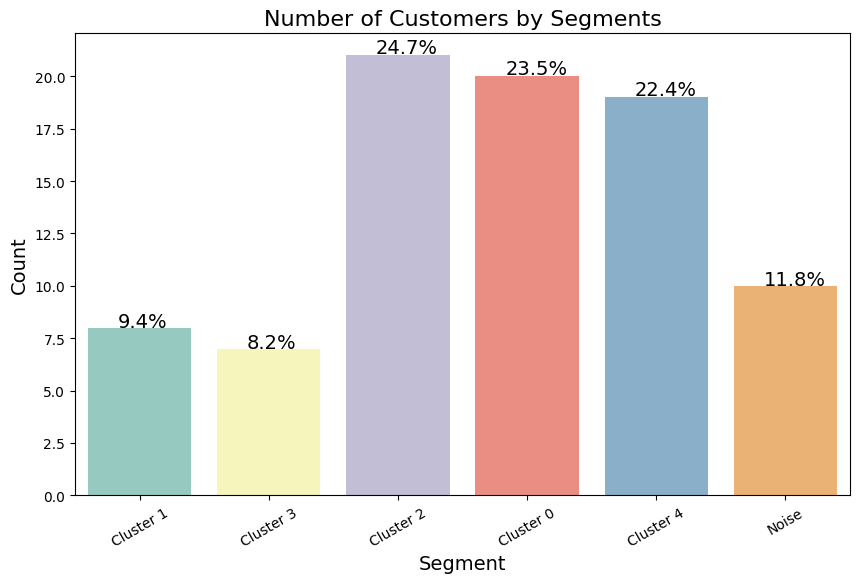

In [89]:
ratio_info(rfm, "HDBSCAN_Cluster")

In [90]:
print('Agglomerative Clustering RFM Model Evaluation '.center(70, '='))
X = rfm[['Recency', 'Frequency', 'Monetary']]
labels = rfm['HDBSCAN_Cluster']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

============Agglomerative Clustering RFM Model Evaluation ============
Number of Observations: 85
Number of Segments: 6
Silhouette Score: -0.262
Calinski Harabasz Score: 13.195
Davies Bouldin Score: 3.764 


## Combined RFM Scoring Clustering data analysis

In [91]:
rfm['RFM_Score'].value_counts()

RFM_Score
411    32
422    14
421    13
432     6
311     6
322     5
412     2
444     2
423     1
321     1
443     1
442     1
111     1
Name: count, dtype: int64

In [92]:
custom_segment_map = {
    '411': 'New Enthusiasts',
    r'42[2-3]': 'Moderately Engaged Customers',
    '421': 'Beginning Customers',
    '432': 'Future Big Customers',
    r'3[1-2]1': 'Disinterested Customers',
    '322': 'Stable Customers',
    '412': 'New Interested Parties',
    '444': 'Champions',
    r'44[2-3]': 'Loyal Customers',
    '111': 'Dormant'
}

rfm['RFM_Custom_Segment'] = rfm['RFM_Score'].replace(custom_segment_map, regex = True)
rfm['RFM_Custom_Segment'].value_counts()

RFM_Custom_Segment
New Enthusiasts                 32
Moderately Engaged Customers    15
Beginning Customers             13
Disinterested Customers          7
Future Big Customers             6
Stable Customers                 5
Loyal Customers                  2
Champions                        2
New Interested Parties           2
Dormant                          1
Name: count, dtype: int64

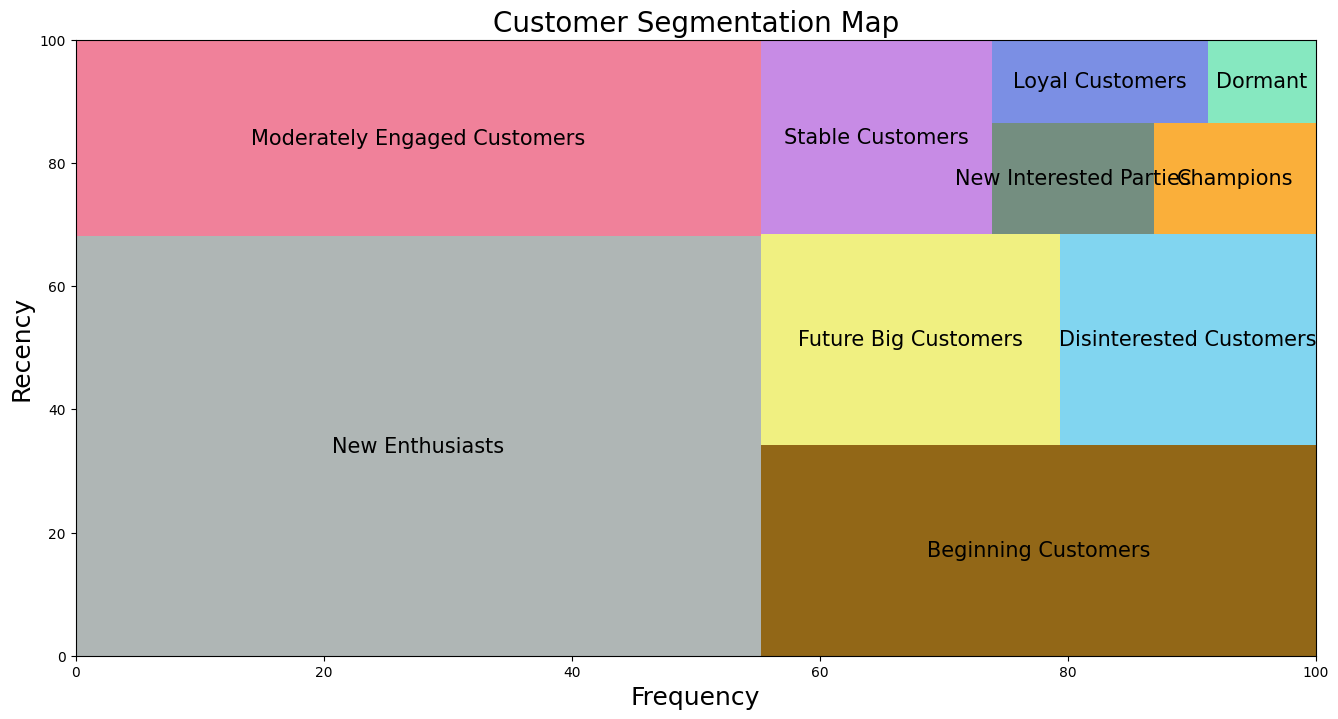

In [93]:
segments = rfm["RFM_Custom_Segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)
squarify.plot(
    sizes=segments,
    label=[label for label in custom_segment_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

**Custom Segments and Descriptions**:

411: **New Enthusiasts**

- Characteristics:
    - High Recency (R = 4): Recently engaged or made their first purchase.
    - Low Frequency (F = 1): Limited number of purchases so far.
    - Low Monetary Value (M = 1): Minimal spending, likely testing the waters.

- Description:
Customers who recently interacted but have not yet shown strong engagement or spending patterns. They are in the early stages of their relationship with the company.

- Action:
Offer introductory discounts or exclusive promotions to encourage repeated purchases and higher spending.

423 or 422: **Moderately Engaged Customers**

- Characteristics:
    - High Recency (R = 4): Actively engaged in recent times.
    - Moderate Frequency (F = 2): Regular but not highly frequent purchasers.
    - Moderate Monetary Value (M = 2): Spend at an average level.

- Description:
Customers who are somewhat engaged, purchasing occasionally and contributing moderately to revenue.

- Action:
Introduce loyalty programs or bundle offers to increase their purchase frequency and spending.

421: **Beginning Customers**

- Characteristics:
    - High Recency (R = 4): Recently interacted with the company.
    - Moderate Frequency (F = 2): A few purchases made.
    - Low Monetary Value (M = 1): Small transaction amounts.

- Description:
New or emerging customers with limited spending but promising potential for growth.

- Action:
Focus on upselling and cross-selling strategies to increase their basket size and frequency.

432: **Future Big Customers**

- Characteristics:
    - High Recency (R = 4): Recently active and engaged.
    - Moderate-to-High Frequency (F = 3): Demonstrated regular purchasing habits.
    - Moderate Monetary Value (M = 2): Spend moderately but show potential for higher value.

- Description:
Customers who exhibit strong engagement and purchasing patterns, positioning them as potential high-value customers.

- Action:
Provide premium offerings or early access to new products to nurture their potential.

321 or 311: **Disinterested Customers**

- Characteristics:
    - Moderate Recency (R = 3): Their last interaction was not recent but not overly distant.
    - Low Frequency (F = 1): Rarely make purchases.
    - Low Monetary Value (M = 1): Spend minimal amounts.

- Description:
Customers who are losing interest and risk becoming inactive.

- Action:
Deploy reactivation campaigns with personalized offers or surveys to understand their lack of engagement.

322: **Stable Customers**

- Characteristics:
    - Moderate Recency (R = 3): Engaged periodically but not highly recently.
    - Moderate Frequency (F = 2): Make occasional purchases.
    - Moderate Monetary Value (M = 2): Spend at an average level.

- Description:
Steady customers who are consistent but not highly engaged. They provide a reliable revenue stream.

- Action:
Strengthen their loyalty with exclusive offers or memberships to enhance engagement.

412: **New Interested Parties**

- Characteristics:
    - High Recency (R = 4): Recently engaged with the brand.
    - Low Frequency (F = 1): Made very few purchases so far.
    - Moderate Monetary Value (M = 2): Show willingness to spend but are in early stages.

- Description:
New customers showing initial signs of interest and engagement with moderate spending capacity.

- Action:
Offer targeted content or introductory packages to build a stronger relationship and foster frequent engagement.

444: **Champions**

- Characteristics:
    - High Recency (R = 4): Regularly interact with the company.
    - High Frequency (F = 4): Purchase very often.
    - High Monetary Value (M = 4): Spend significantly.

- Description:
The most valuable customers who are loyal, frequent buyers and contribute heavily to revenue.

- Action:
Reward them with exclusive benefits, priority services, and personalized communications to retain loyalty.

442 or 443: **Loyal Customers**

- Characteristics:
    - High Recency (R = 4): Recently interacted.
    - High Frequency (F = 4): Very frequent buyers.
    - Moderate Monetary Value (M = 3): Spend at an average level.

- Description:
Highly frequent customers who maintain steady engagement but have room to grow their spending.

- Action:
Provide incentives to increase their spending, such as tiered loyalty rewards or targeted upsell campaigns.

111: **Dormant**

- Characteristics:
    - Low Recency (R = 1): Last purchase was a long time ago.
    - Low Frequency (F = 1): Rarely purchased.
    - Low Monetary Value (M = 1): Spend minimal amounts.

- Description:
Completely inactive customers who have disengaged.

- Action:
Re-engage them with special offers, nostalgia-driven marketing, or win-back campaigns.

### Metrics and Results

In [94]:
print('RFM Model Evaluation '.center(70, '='))
X = rfm[['R_Score', 'F_Score', 'M_Score']]
labels = rfm['RFM_Custom_Segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

========================RFM Model Evaluation =========================
Number of Observations: 85
Number of Segments: 10
Silhouette Score: 0.921
Calinski Harabasz Score: 391.104
Davies Bouldin Score: 0.273 


- The Silhouette Score measures the similarity of a point to its own cluster compared to its distance to the nearest cluster. The value ranges from -1 to 1, Values close to 1 indicate that the points are well clustered and far from other clusters (good clusters). Values close to 0 indicate that the points are on the border between two clusters. Negative values indicate that the points may have been grouped incorrectly.
- A **Silhouette Score** of **0.921** is excellent and indicates that the clusters are well defined. Most of the points are well grouped, with little overlap between the clusters.


- Measure the separation between clusters and the cohesion within clusters. The Calinski-Harabasz Score is based on the ratio between the sum of the dispersion between the clusters and the sum of the dispersion within the clusters. The higher the value, the better the separation and cohesion of the clusters. Higher values indicate that the clusters are well separated and cohesive and smaller values indicate that the clusters are poorly defined.
- A **Calinski-Harabasz Score** of **391.104** is quite high, which suggests that the clusters are well separated and well defined, with a good overall structure.


- The Davies-Bouldin Score calculates the average of the similarity ratios between all pairs of clusters. The similarity between two clusters is the sum of the dispersion within each cluster divided by the distance between the cluster centers. The lower the value, the better the quality of the clusters (i.e. the less similarity between clusters and the more separated they are). Smaller values indicate more distinct and well-defined clusters and larger values indicate more similar clusters and therefore worse clustering.
- A **Davies-Bouldin Score** of **0.273** is very good, indicating that the clusters are well separated and distinct from each other.

### Conclusion

After all clustering methods analysis above, we can conclude that the RFM segmentation score is a good way to direct our deep dive analysis

# Best Clustering Algorithm Exploratory Data Analysis

### Geographical analysis of Customers segment

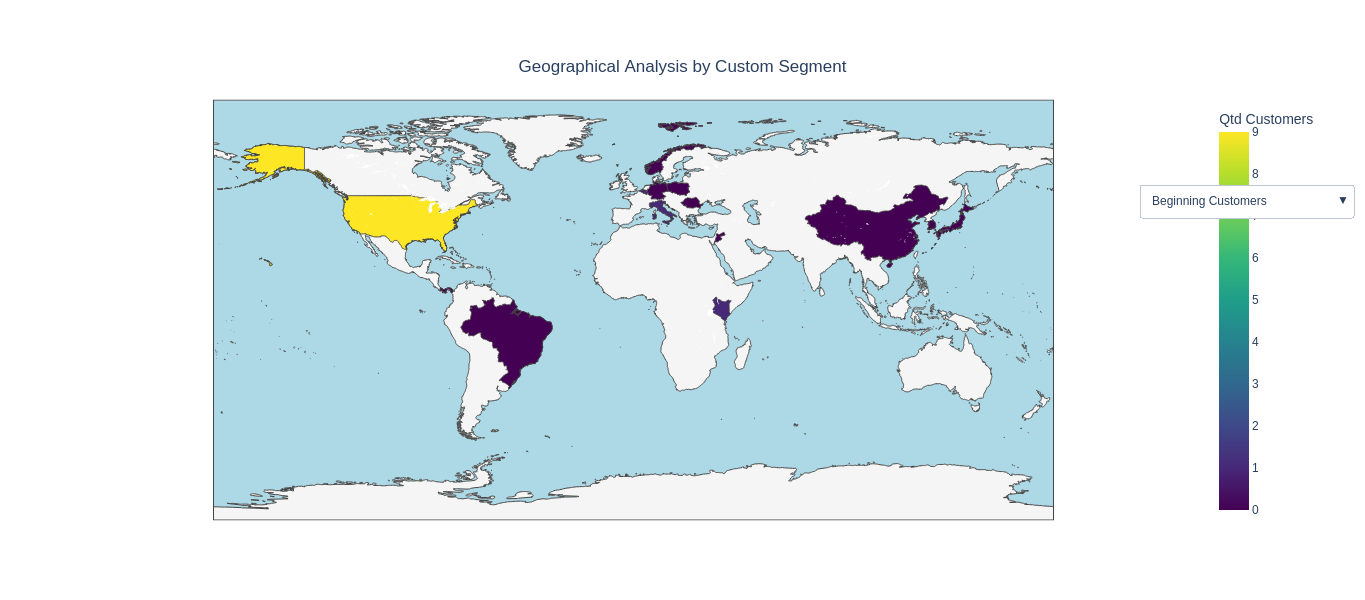

In [95]:
world_map = rfm.groupby(
    ['office_location', 'RFM_Custom_Segment']
).size().reset_index(name='count')

choropleth_data = world_map.pivot_table(
    index='office_location', 
    columns='RFM_Custom_Segment', 
    values='count', 
    fill_value=0
)

fig = go.Figure()

for segment in choropleth_data.columns:
    fig.add_trace(
        go.Choropleth(
            locations=choropleth_data.index,
            locationmode='country names',
            z=choropleth_data[segment],
            text=choropleth_data.index,
            colorscale='Viridis',
            colorbar_title='Qtd Customers',
            visible=False
        )
    )

fig.data[0].visible = True

buttons = []
for i, segment in enumerate(choropleth_data.columns):
    buttons.append(dict(
        label=segment,
        method="update",
        args=[
            {"visible": [j == i for j in range(len(fig.data))]},  # Atualiza a visibilidade
            {"z": [choropleth_data[segment]]},  # Atualiza os valores de cor
            {"title": f"Geographical Analysis for {segment}"}  # Atualiza o título
        ]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=1.15,
            y=0.8
        )
    ],
    title={
        'text': f"Geographical Analysis by Custom Segment",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    geo=dict(
        resolution=50,
        showocean=True,
        oceancolor="LightBlue",
        showland=True,
        landcolor="whitesmoke",
        showframe=True
    ),
    template='plotly_white',
    height=600,
    width=1000
)

fig.show()

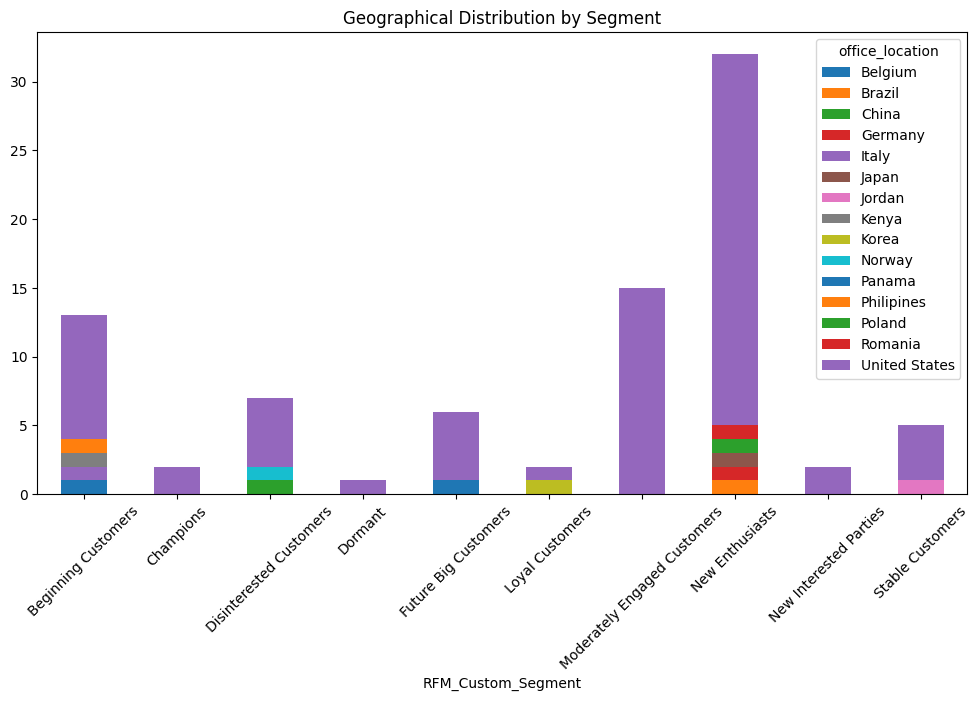

In [98]:
segment_geography = rfm.groupby(['RFM_Custom_Segment', 'office_location']).size().unstack()
segment_geography.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title("Geographical Distribution by Segment")
plt.xticks(rotation=45)
plt.show()

We can notice that New enthusiasts is the segment with the most variability of different country customers 

## Product Acceptance by Group

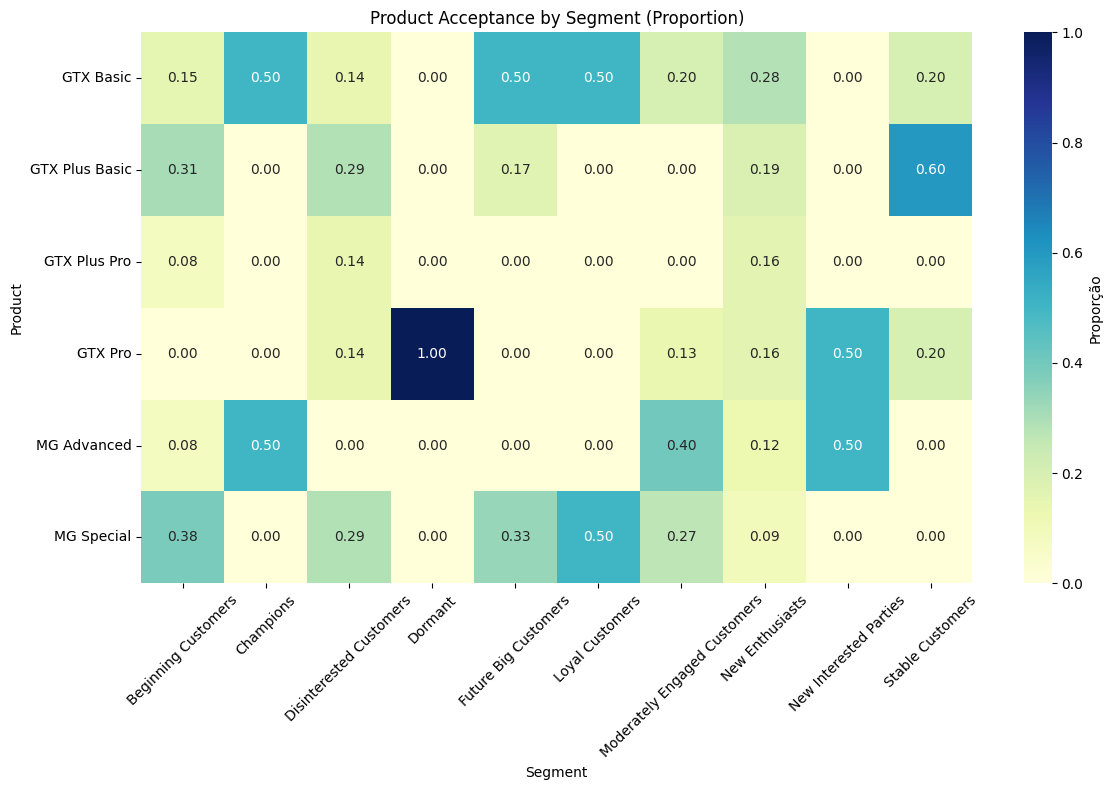

In [99]:
product_segment = rfm.groupby(['RFM_Custom_Segment', 'product']).size().reset_index(name='count')

product_segment_pivot = product_segment.pivot_table(
    index='product', 
    columns='RFM_Custom_Segment', 
    values='count', 
    fill_value=0
)

product_segment_normalized = product_segment_pivot.div(product_segment_pivot.sum(axis=0), axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(product_segment_normalized, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Proporção'})
plt.title('Product Acceptance by Segment (Proportion)')
plt.xlabel('Segment')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Revenue analysis by segment

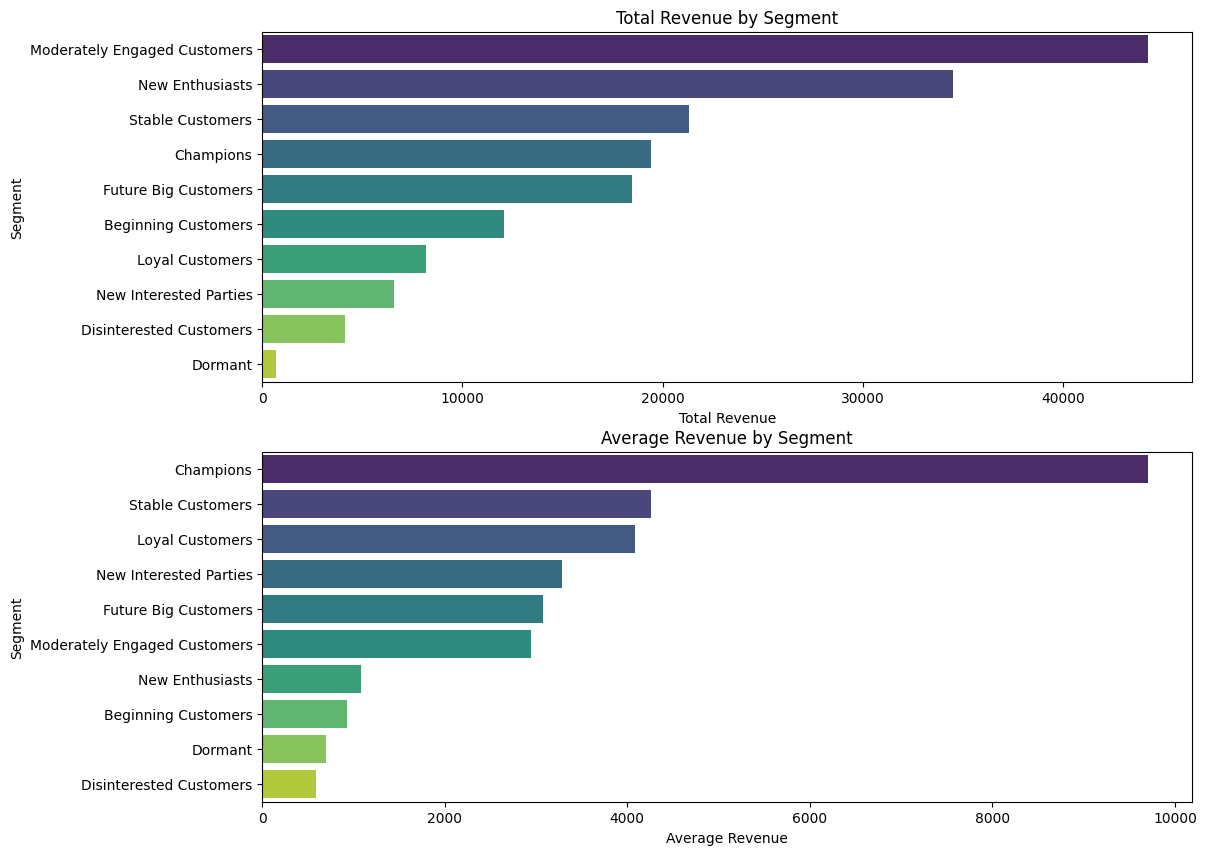

In [100]:
total_segment_revenue = rfm.groupby('RFM_Custom_Segment')['revenue'].sum().reset_index()
total_segment_revenue = total_segment_revenue.sort_values(by='revenue', ascending=False)

average_segment_revenue = rfm.groupby('RFM_Custom_Segment')['revenue'].mean().reset_index()
average_segment_revenue = average_segment_revenue.sort_values(by='revenue', ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
sns.barplot(y='RFM_Custom_Segment', x='revenue', data=total_segment_revenue, palette='viridis', orient='h', ax=ax1)
ax1.set_title('Total Revenue by Segment')
ax1.set_xlabel('Total Revenue')
ax1.set_ylabel('Segment')

sns.barplot(y='RFM_Custom_Segment', x='revenue', data=average_segment_revenue, palette='viridis', orient='h', ax=ax2)
ax2.set_title('Average Revenue by Segment')
ax2.set_xlabel('Average Revenue')
ax2.set_ylabel('Segment')
plt.show()

In [101]:
low_revenue_segments = average_segment_revenue[average_segment_revenue['revenue'] < average_segment_revenue['revenue'].mean()]
print("Less profitable segments that can be optimized:")
low_revenue_segments

Less profitable segments that can be optimized:


,RFM_Custom_Segment,revenue
6,Moderately Engaged Customers,2947.649333
7,New Enthusiasts,1078.109062
0,Beginning Customers,928.705385
3,Dormant,702.720000
2,Disinterested Customers,590.870000


## Ratio of Customers by Segments

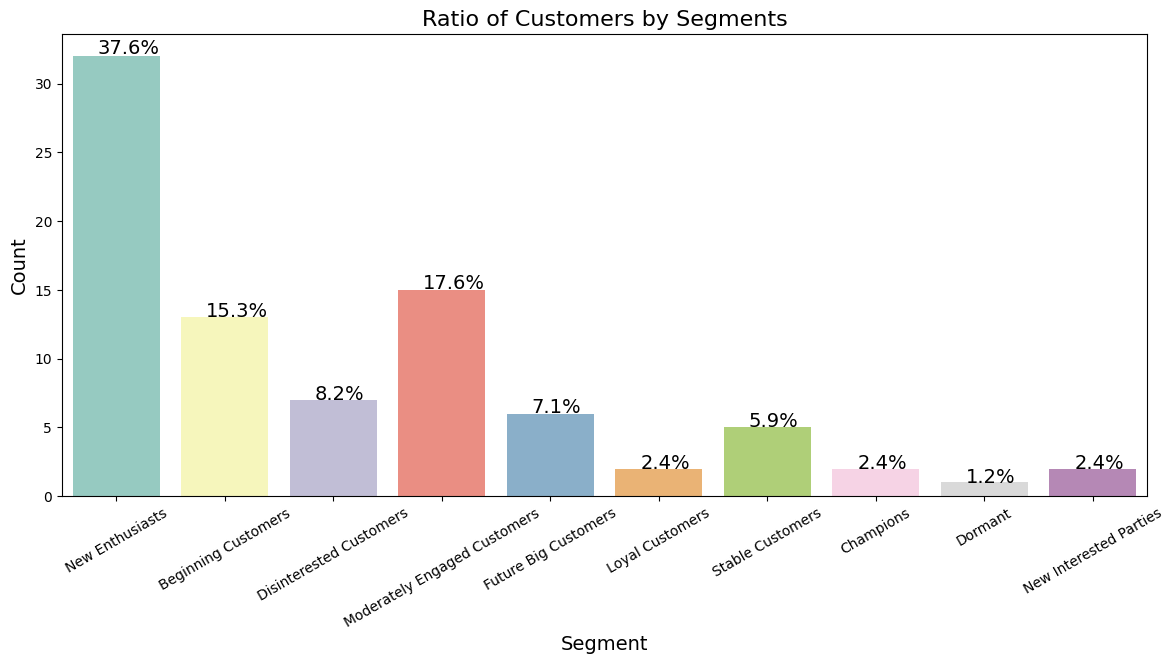

In [102]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(data = rfm,
                   x = 'RFM_Custom_Segment',
                   palette = 'Set3')
total = len(rfm['RFM_Custom_Segment'])
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Ratio of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=30)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

## Customers Segment by RFM

/tmp/ipykernel_13162/4145280401.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_13162/4145280401.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_13162/4145280401.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



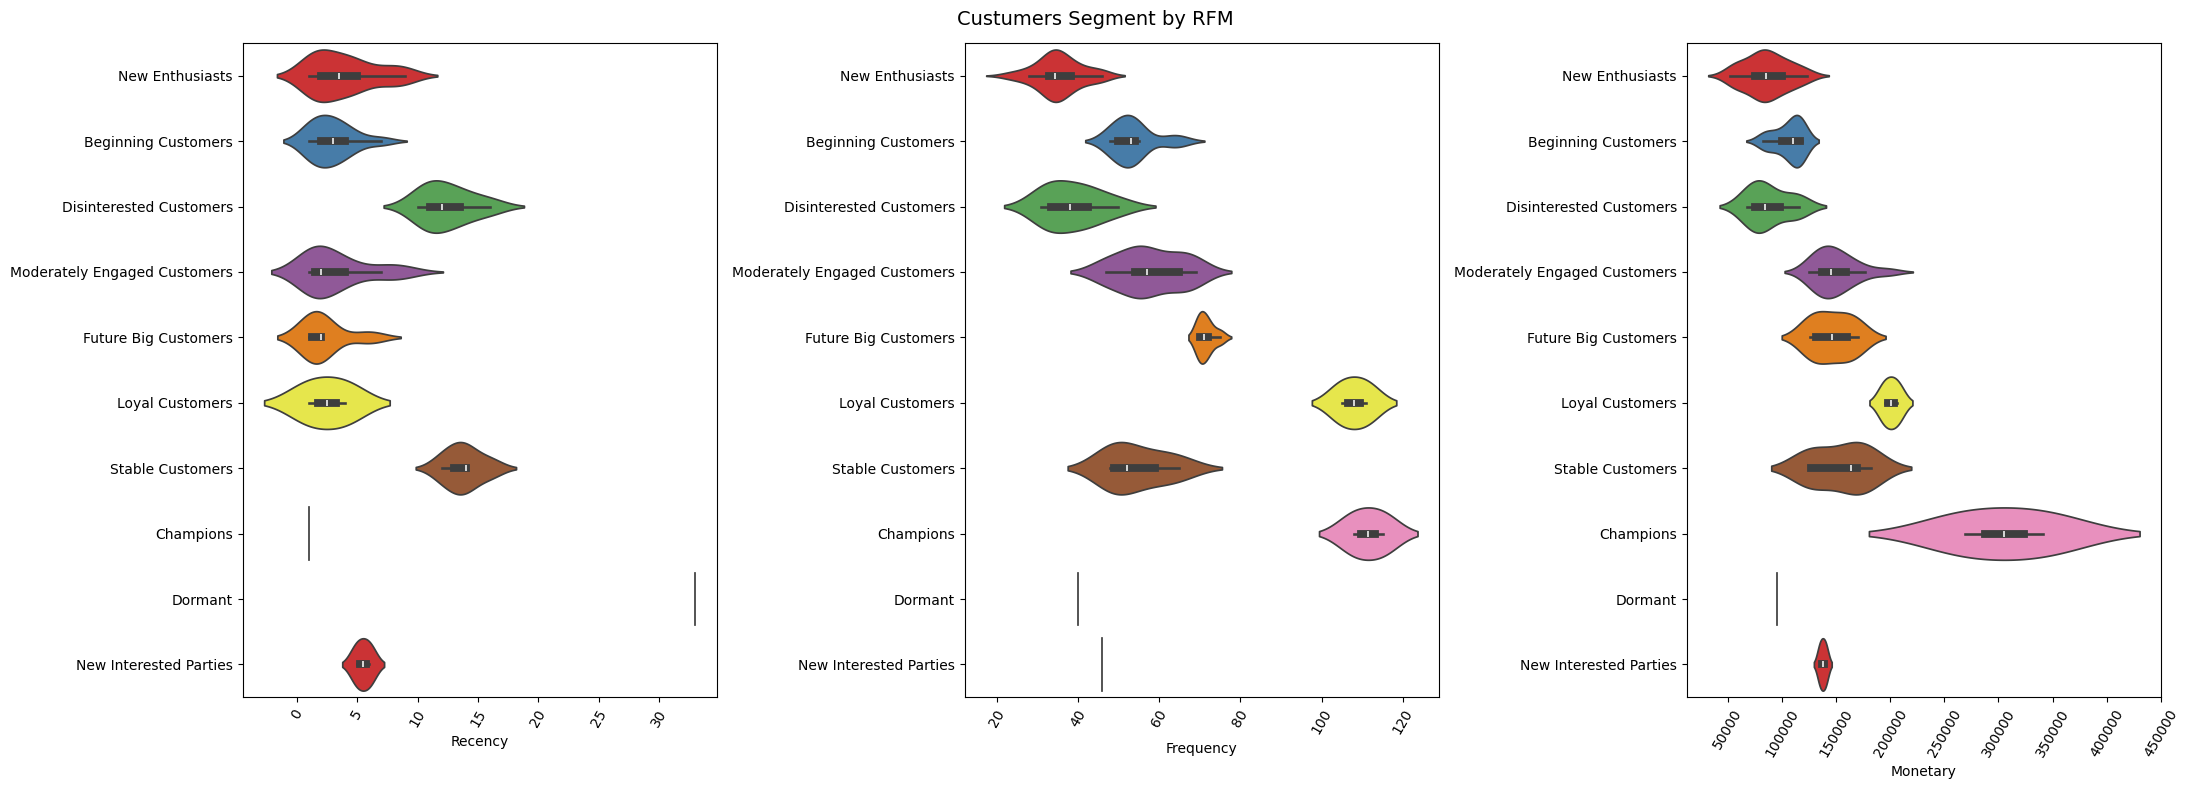

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle("Custumers Segment by RFM", size=14)
feature_list = ['Recency', 'Frequency', 'Monetary']
for idx, col in enumerate(feature_list):
    sns.violinplot(
        ax=axes[idx], data=rfm, y="RFM_Custom_Segment", x=feature_list[idx], orient='h', palette='Set1'
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    axes[idx].set_ylabel("")
    
plt.tight_layout()
plt.show()

We can notice that Champions customers have the lowest Recency (good), highest frequency and Monetary 

## Expanding RFM metrics for Statiscal segment analysis

### Actual Customer Lifetime Value (CLTV) 
Total value each customer has brought over the course of all purchases with a discount rate for inflation exclusion. Combining this with RFM metrics can help to identify the most valuable customers.

Actual_CLTV = $\frac{Monetary}{(1+discount\_rate)Months\_Since\_Start}$

<Axes: xlabel='Actual_CLTV', ylabel='Count'>

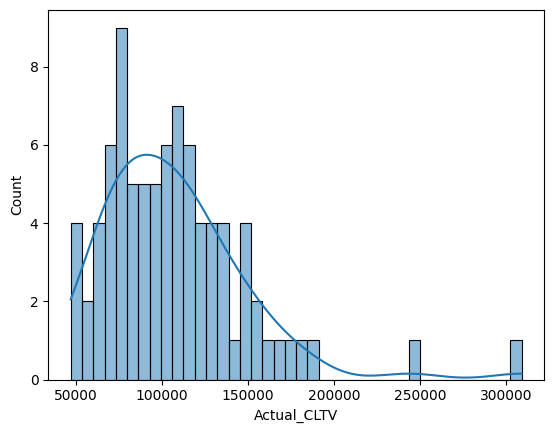

In [104]:
discount_rate = 0.01 # Monthy inflation (simulation)
observation_start = rfm['first_purchase'].min()

rfm['Months_Since_Start'] = ((rfm['last_purchase'] - observation_start).dt.days / 30).astype(int)
rfm['Actual_CLTV'] = rfm['Monetary'] / ((1 + discount_rate) ** rfm['Months_Since_Start'])

cltv_discounted = rfm.groupby('account')['Actual_CLTV'].sum().reset_index()
sns.histplot(cltv_discounted['Actual_CLTV'], bins=40, kde=True)

### Recency to Frequency Ratio (R/F Ratio)
A customer with high frequency and low recency may be more engaged than a customer with high recency and low frequency.

In [105]:
rfm['RF_Ratio'] = rfm['Recency'] / (rfm['Frequency'] + 1)

<Axes: xlabel='RF_Ratio', ylabel='Count'>

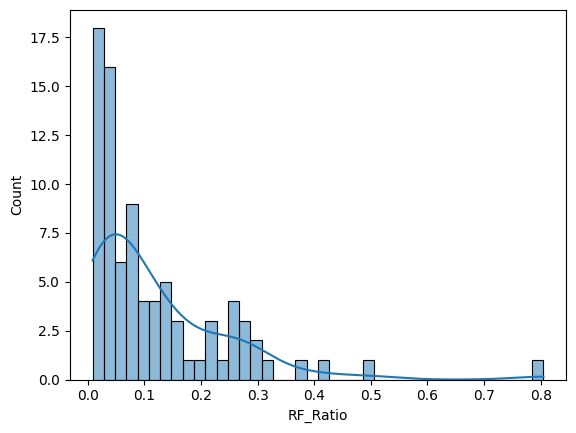

In [106]:
sns.histplot(rfm['RF_Ratio'], bins=40, kde=True)

### Average Transaction Value (ATV)
Shows how much customers spend on average per purchase.

In [107]:
rfm['ATV'] = rfm['Monetary'] / rfm['Frequency']

<Axes: xlabel='ATV', ylabel='Count'>

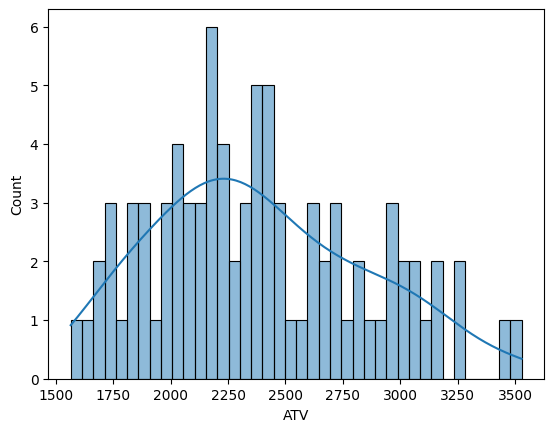

In [108]:
sns.histplot(rfm['ATV'], bins=40, kde=True)

### Engagement Score
Show customers based on metrics such as Recency, Frequency and Monetary. Customers with low scores may be at greater risk of churn.

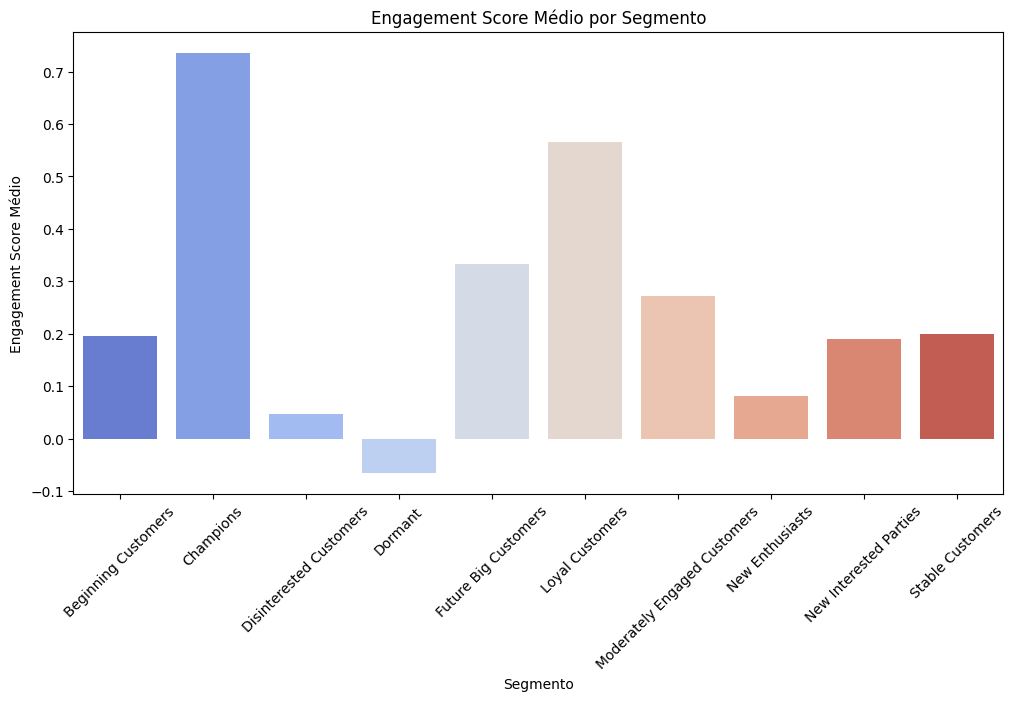

In [110]:
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

rfm['engagement_score'] = rfm_scaled[:, 1] * 0.4 + rfm_scaled[:, 2] * 0.4 - rfm_scaled[:, 0] * 0.2

engagement_by_segment = rfm.groupby('RFM_Custom_Segment')['engagement_score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='RFM_Custom_Segment', y='engagement_score', data=engagement_by_segment, palette='coolwarm')
plt.title('Engagement Score Médio por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Engagement Score Médio')
plt.xticks(rotation=45)
plt.show()

### Descritive Statistics metrics from Recency, Frequency, Monetary, LTV, RF Ratio, ATV and Engagement Score

In [114]:
summary_table = rfm[['Recency', 'Monetary', 'Frequency', 'RFM_Custom_Segment', 'Actual_CLTV', 'RF_Ratio', 'ATV', 'engagement_score']]\
.groupby('RFM_Custom_Segment')\
.agg({'mean','std', 'median', 'max','min'})

styled_table = summary_table.style.format({
    'mean': '{:.2f}',
    'std': '{:.2f}',
    'max': '{:.2f}',
    'min': '{:.2f}'
})

styled_table

# CLTV (Customer Lifetime Value)

1. **Include only Won opportunities**:

Advantages:  
- Focus on customers who generated revenue.  
- Frequency, recency, and monetary value metrics better reflect the behavior of customers who generated financial value.  
- CLTV will be more realistic in terms of expected financial return.  

Disadvantages:  
- Ignores behavioral patterns of customers who started negotiations but did not close them. This may lead to an incomplete view of the customer lifecycle.  

2. **Include all opportunities (Won and Lost)**:

Advantages:
- Captures a broader view of customer behavior, including the number of unconverted negotiations.  
- Can be useful to understand the total sales effort and how it reflects in conversion rates and CLTV.  

Disadvantages:
- May distort metrics:  
    - Frequency may increase but without real monetary correspondence.  
    - Monetary value decreases (Lost opportunities always have a monetary value of 0).  
    - CLTV may be underestimated, as it will be diluted by unconverted opportunities.  

### Building Summary data from Transaction data for Model fitting

In [115]:
df_lost = df[df['deal_stage'] == 'Lost']
df_won = df[df['deal_stage'] == 'Won']

In [117]:
summary = summary_data_from_transaction_data(
    df_won,
    customer_id_col='account',
    datetime_col='close_date',
    monetary_value_col='close_value',
    observation_period_end=today_date,
    # include_first_transaction=True
)

In [118]:
df_won.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 7211
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   opportunity_id                 4238 non-null   object        
 1   sales_agent                    4238 non-null   object        
 2   product                        4238 non-null   object        
 3   account                        4238 non-null   object        
 4   deal_stage                     4238 non-null   object        
 5   engage_date                    4238 non-null   datetime64[ns]
 6   close_date                     4238 non-null   datetime64[ns]
 7   close_value                    4238 non-null   float64       
 8   sector                         4238 non-null   object        
 9   year_established               4238 non-null   object        
 10  revenue                        4238 non-null   float64       
 11  employees             

## Building BG-NBD model

**Beta Geometric / Negative Binomial Distribution** (BG/NBD) models assume that the number of transactions made by each customer follows a Poisson process. This means that while a customer is "alive" (i.e., still active and not yet churned), purchases occur randomly over time at a constant average rate. However, not all customers are the same—there is heterogeneity in transaction rates across customers, and this variation is modeled by assuming that these individual rates follow a gamma distribution.

This mixture of a Poisson process with a gamma-distributed rate naturally leads to a Negative Binomial Distribution (NBD) for modeling the number of transactions a customer makes over their lifetime. In addition to capturing the variability in purchasing behavior, the model also incorporates a dropout or "death" process: it assumes that after each transaction, a customer has a constant probability of becoming inactive. This dropout probability is modeled using a beta distribution (hence the “Beta Geometric” part of the name), which accounts for heterogeneity in churn behavior across customers.

In practical terms, the BG/NBD model not only allows us to predict the expected number of future transactions for each customer, but it also provides an estimate of the probability that a customer is still active at any given time. This dual capability makes it particularly valuable for calculating Customer Lifetime Value (CLV) in non-contractual settings, where churn is not directly observable.

We can implement and calibrate the BG/NBD model using libraries like BetaGeoFitter from the lifetimes package in Python. These tools facilitate parameter estimation from historical transaction data, enabling us to generate actionable insights such as:

- **Future Transaction Predictions**: Estimating how many purchases a customer is likely to make in a specified future period.
- **Customer Activity Probabilities**: Assessing the likelihood that a customer remains active, which can inform retention strategies.
- **Segmentation and CLV Estimation**: Identifying high-value customers based on their predicted future activity and tailoring marketing efforts accordingly.

Overall, the BG/NBD framework provides a robust statistical foundation for understanding customer behavior, forecasting future transactions, and ultimately driving more informed business decisions.

In [119]:
bgf = BetaGeoFitter(penalizer_coef=0.005)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])
bgf.params_

r        5.045242e+00
alpha    3.419723e+01
a        9.603632e-29
b        5.249199e-16
dtype: float64

### Model prediction 

In [120]:
summary['prob_alive'] = bgf.conditional_probability_alive(
    summary['frequency'], summary['recency'], summary['T']
)

summary['expected_purchases_day'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    1, summary['frequency'], summary['recency'], summary['T']
)

summary['expected_purchases_week'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    7, summary['frequency'], summary['recency'], summary['T']
)

summary['expected_purchases_monthly'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    30, summary['frequency'], summary['recency'], summary['T']
)

summary['expected_purchases_bimonthly'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    61, summary['frequency'], summary['recency'], summary['T']
)

summary['expected_purchases_trimester'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    92, summary['frequency'], summary['recency'], summary['T']
)

summary['expected_purchases_half_year'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    182, summary['frequency'], summary['recency'], summary['T']
)

summary['expected_purchases_year'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    365, summary['frequency'], summary['recency'], summary['T']
)

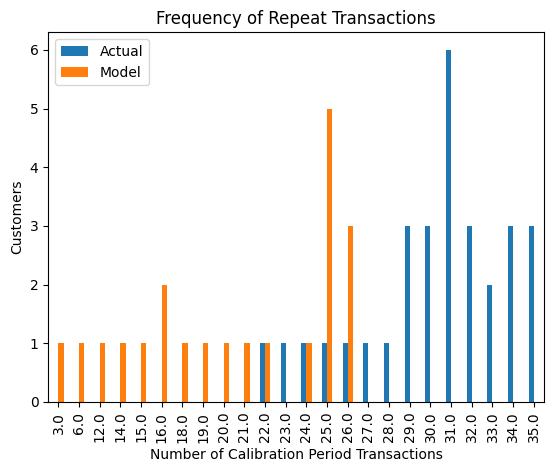

In [122]:
plot_period_transactions(bgf, max_frequency=14)
plt.show()

## Building GammaGammaFitter model

The Gamma-Gamma model, implemented via the GammaGammaFitter, complements models like BG/NBD by focusing on the monetary aspect of customer behavior. It is designed to estimate the average monetary value of a customer's transactions, operating under the key assumption that the transaction values for each customer follow a Gamma distribution. At the same time, it captures heterogeneity across customers by assuming that their underlying average transaction values are drawn from another Gamma distribution. Here’s a more detailed breakdown:

**Modeling Transaction Value**:
- The GammaGammaFitter assumes that each customer’s average transaction value is not fixed but rather follows a Gamma distribution. This reflects the natural variability in how much different customers spend.

**Capturing Customer Heterogeneity**:
- Just as the BG/NBD model accounts for variability in transaction frequency, the Gamma-Gamma model acknowledges that not all customers are equal when it comes to spending. The model assumes that the differences in average transaction values across customers can be modeled with a second Gamma distribution. This layered approach allows the model to adjust for variations in purchasing power and behavior.

**Independence Assumption**:
- A critical assumption of the Gamma-Gamma model is that the monetary value is independent of the transaction frequency (i.e., the number of transactions). In other words, once you know a customer’s average spend, it does not depend on how often they purchase, provided they remain active. This separation allows businesses to model the “how much” (monetary value) separately from the “how often” (frequency).

**Parameter Estimation and Usage**:
- Using maximum likelihood estimation, the GammaGammaFitter estimates parameters (often denoted as p, q, and v) from the historical transaction data. Once fitted, the model can predict the expected average monetary value per transaction for each customer. When combined with frequency predictions from a model like BG/NBD, these estimates can be used to compute an overall Customer Lifetime Value (CLV).

**Actionable Business Insights**:
- With a reliable estimate of the average transaction value in hand, businesses can:
    - Segment customers based on their expected monetary contribution.
    - Tailor marketing and retention strategies to target high-spending customers.
    - Better forecast revenue and optimize resource allocation for maximum profitability.

In summary, the GammaGammaFitter provides a robust statistical framework for understanding and predicting customer spending behavior. By accurately estimating the average transaction value, it enables businesses to make more informed decisions regarding customer segmentation, personalized marketing efforts, and long-term revenue forecasting.

In [123]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(summary['frequency'], summary['monetary_value'])

summary['expected_average_profit'] = ggf.conditional_expected_average_profit(
    summary['frequency'], summary['monetary_value']
)

## CLTV prediction

Customer Lifetime Value Prediction is a measurement of how money a customer will bring your brand throughout their entire time as a paying customer.

In [124]:
summary['Predicted_Year_CLTV'] = ggf.customer_lifetime_value(
    bgf,
    summary['frequency'],
    summary['recency'],
    summary['T'],
    summary['monetary_value'],
    time=12,  # Monthly
    discount_rate=0.01,  # Monthly discount
)

summary['Predicted_Year_CLTV'].sort_values(ascending = False)

account
Kan-code      354798.482528
Konex         285678.410436
Cheers        219641.331049
Condax        218436.534924
Hottechi      205498.449733
                  ...      
Sumace         68376.756151
Donware        67937.588872
Zathunicon     67806.664650
Zoomit         60547.768149
Golddex        59853.031778
Name: Predicted_Year_CLTV, Length: 85, dtype: float64

### Year CLTV Segmentation

In [125]:
summary['Predicted_CLTV_Segment'] = pd.qcut(summary['Predicted_Year_CLTV'], q=3, labels=['Low', 'Medium', 'High'])
summary[['Predicted_CLTV_Segment', 'Predicted_Year_CLTV']].head(15)

,Predicted_CLTV_Segment,Predicted_Year_CLTV
account,,
Acme Corporation,Medium,119003.454178
Betasoloin,Medium,106019.123725
Betatech,Medium,120905.100831
Bioholding,Low,103975.876666
Bioplex,Low,81276.901848
Blackzim,Low,101110.562252
Bluth Company,Low,85597.482157
Bubba Gump,Medium,107359.282826
Cancity,Medium,129417.775100


<Axes: xlabel='Predicted_Year_CLTV', ylabel='Count'>

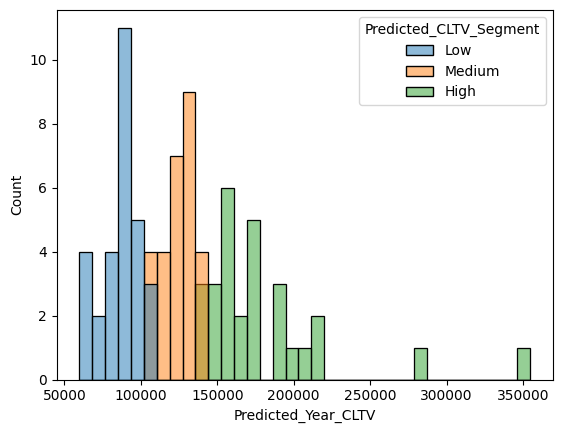

In [126]:
sns.histplot(x=summary['Predicted_Year_CLTV'], hue=summary['Predicted_CLTV_Segment'], bins=35)

# Exporting The final enriched dataset

In [127]:
print(rfm.columns)
rfm.head()

Index(['account', 'first_purchase', 'last_purchase', 'Recency', 'Frequency',
       'Monetary', 'office_location', 'product', 'revenue', 'R_Score',
       'F_Score', 'M_Score', 'RFM_Score', 'Kmeans_Cluster', 'Agg_Cluster',
       'HDBSCAN_Cluster', 'RFM_Custom_Segment', 'Months_Since_Start',
       'Actual_CLTV', 'RF_Ratio', 'ATV', 'engagement_score'],
      dtype='object')


,account,first_purchase,last_purchase,Recency,Frequency,Monetary,office_location,product,revenue,R_Score,...,RFM_Score,Kmeans_Cluster,Agg_Cluster,HDBSCAN_Cluster,RFM_Custom_Segment,Months_Since_Start,Actual_CLTV,RF_Ratio,ATV,engagement_score
0,Acme Corporation,2017-03-01,2017-12-27,5,34,101744.0,United States,GTX Basic,1100.04,4,...,411,0,0,Cluster 1,New Enthusiasts,10,92107.515918,0.142857,2992.470588,0.091988
1,Betasoloin,2017-03-01,2017-12-28,4,34,97036.0,United States,GTX Plus Pro,251.41,4,...,411,0,0,Cluster 1,New Enthusiasts,10,87845.424936,0.114286,2854.000000,0.091741
2,Betatech,2017-03-08,2017-12-29,3,53,107408.0,Kenya,GTX Plus Pro,647.18,4,...,421,2,2,Cluster 3,Beginning Customers,10,97235.061230,0.055556,2026.566038,0.194914
3,Bioholding,2017-03-10,2017-12-28,4,50,90991.0,Philipines,MG Special,587.34,4,...,421,0,2,Cluster 2,Beginning Customers,10,82372.965294,0.078431,1819.820000,0.152963
4,Bioplex,2017-03-04,2017-12-16,16,31,67393.0,United States,MG Special,326.82,3,...,311,1,0,Cluster 0,Disinterested Customers,9,61620.103775,0.500000,2173.967742,-0.037215


In [128]:
rfm_to_merge = rfm.drop(columns=['product', 'revenue', 'Kmeans_Cluster', 'Agg_Cluster',
       'HDBSCAN_Cluster', 'Months_Since_Start', 'office_location'])
rfm_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   account             85 non-null     object        
 1   first_purchase      85 non-null     datetime64[ns]
 2   last_purchase       85 non-null     datetime64[ns]
 3   Recency             85 non-null     int64         
 4   Frequency           85 non-null     int64         
 5   Monetary            85 non-null     float64       
 6   R_Score             85 non-null     category      
 7   F_Score             85 non-null     category      
 8   M_Score             85 non-null     category      
 9   RFM_Score           85 non-null     object        
 10  RFM_Custom_Segment  85 non-null     object        
 11  Actual_CLTV         85 non-null     float64       
 12  RF_Ratio            85 non-null     float64       
 13  ATV                 85 non-null     float64       
 

In [129]:
print(df_won.info())
df_won.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4238 entries, 0 to 7211
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   opportunity_id                 4238 non-null   object        
 1   sales_agent                    4238 non-null   object        
 2   product                        4238 non-null   object        
 3   account                        4238 non-null   object        
 4   deal_stage                     4238 non-null   object        
 5   engage_date                    4238 non-null   datetime64[ns]
 6   close_date                     4238 non-null   datetime64[ns]
 7   close_value                    4238 non-null   float64       
 8   sector                         4238 non-null   object        
 9   year_established               4238 non-null   object        
 10  revenue                        4238 non-null   float64       
 11  employees             

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,...,office_location,subsidiary_of,series,sales_price,manager,regional_office,sales_cycle_duration,agent_close_rate,opportunities_per_account,opportunities_per_sales_agent
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001,...,United States,NaN,GTX,1096,Dustin Brinkmann,Central,132.0,66.153846,101,216
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002,...,United States,NaN,GTX,4821,Melvin Marxen,Central,137.0,63.110307,119,613
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001,...,United States,NaN,MG,55,Melvin Marxen,Central,133.0,63.110307,101,613
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998,...,United States,Acme Corporation,GTX,550,Dustin Brinkmann,Central,135.0,66.153846,121,216
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982,...,United States,NaN,GTX,550,Summer Sewald,West,128.0,61.685824,87,290


In [130]:
print(summary.columns)
summary.head()

Index(['frequency', 'recency', 'T', 'monetary_value', 'prob_alive',
       'expected_purchases_day', 'expected_purchases_week',
       'expected_purchases_monthly', 'expected_purchases_bimonthly',
       'expected_purchases_trimester', 'expected_purchases_half_year',
       'expected_purchases_year', 'expected_average_profit',
       'Predicted_Year_CLTV', 'Predicted_CLTV_Segment'],
      dtype='object')


,frequency,recency,T,monetary_value,prob_alive,expected_purchases_day,expected_purchases_week,expected_purchases_monthly,expected_purchases_bimonthly,expected_purchases_trimester,expected_purchases_half_year,expected_purchases_year,expected_average_profit,Predicted_Year_CLTV,Predicted_CLTV_Segment
account,,,,,,,,,,,,,,,
Acme Corporation,29.0,301.0,306.0,3489.241379,1.0,0.100075,0.700525,3.002250,6.104576,9.206901,18.213652,36.527379,3521.795835,119003.454178,Medium
Betasoloin,31.0,302.0,306.0,2937.806452,1.0,0.105954,0.741678,3.178619,6.463191,9.747764,19.283620,38.673193,2963.447913,106019.123725,Medium
Betatech,48.0,296.0,299.0,2236.625000,1.0,0.159201,1.114405,4.776022,9.711244,14.646467,28.974533,58.108266,2249.209092,120905.100831,Medium
Bioholding,44.0,293.0,297.0,2066.772727,1.0,0.148085,1.036593,4.442541,9.033167,13.623792,26.951415,54.050915,2079.470026,103975.876666,Low
Bioplex,26.0,287.0,303.0,2587.500000,1.0,0.092068,0.644479,2.762055,5.616178,8.470302,16.756466,33.605001,2614.486179,81276.901848,Low


In [131]:
summary_to_merge = summary.drop(columns=['frequency', 'recency', 'monetary_value'])
summary_to_merge.reset_index(inplace=True)
summary_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   account                       85 non-null     object  
 1   T                             85 non-null     float64 
 2   prob_alive                    85 non-null     float64 
 3   expected_purchases_day        85 non-null     float64 
 4   expected_purchases_week       85 non-null     float64 
 5   expected_purchases_monthly    85 non-null     float64 
 6   expected_purchases_bimonthly  85 non-null     float64 
 7   expected_purchases_trimester  85 non-null     float64 
 8   expected_purchases_half_year  85 non-null     float64 
 9   expected_purchases_year       85 non-null     float64 
 10  expected_average_profit       85 non-null     float64 
 11  Predicted_Year_CLTV           85 non-null     float64 
 12  Predicted_CLTV_Segment        85 non-null     catego

In [132]:
export_dataset = (pd.merge(
    pd.merge(
        df_won, rfm_to_merge, on='account', how='inner'
    ), summary_to_merge, on='account', how='inner')
)

In [133]:
print(export_dataset.info())
export_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   opportunity_id                 4238 non-null   object        
 1   sales_agent                    4238 non-null   object        
 2   product                        4238 non-null   object        
 3   account                        4238 non-null   object        
 4   deal_stage                     4238 non-null   object        
 5   engage_date                    4238 non-null   datetime64[ns]
 6   close_date                     4238 non-null   datetime64[ns]
 7   close_value                    4238 non-null   float64       
 8   sector                         4238 non-null   object        
 9   year_established               4238 non-null   object        
 10  revenue                        4238 non-null   float64       
 11  employees        

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,...,expected_purchases_day,expected_purchases_week,expected_purchases_monthly,expected_purchases_bimonthly,expected_purchases_trimester,expected_purchases_half_year,expected_purchases_year,expected_average_profit,Predicted_Year_CLTV,Predicted_CLTV_Segment
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001,...,0.158864,1.112051,4.765933,9.690731,14.615528,28.913328,57.985520,2412.667623,129417.775100,Medium
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002,...,0.173562,1.214933,5.206854,10.587269,15.967685,31.588247,63.350055,2955.439731,173199.239921,High
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001,...,0.158864,1.112051,4.765933,9.690731,14.615528,28.913328,57.985520,2412.667623,129417.775100,Medium
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998,...,0.205896,1.441272,6.176879,12.559655,18.942430,37.473068,75.152032,2087.026157,145092.679086,High
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982,...,0.126903,0.888323,3.807098,7.741100,11.675102,23.096397,46.319698,3112.094860,133350.737821,Medium


In [134]:
export_dataset.to_json('../data/won_stage_enriched_data.json')